In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [11]:
# def preprocess_data(df):
#     """
#     Preprocess the data for clustering.
#     """
#     # Select relevant features for clustering
#     features = ['Returns', 'SMA_50', 'EMA_20', 'RSI', 'MACD', 'BB_Pct', 'ATR', 'OBV', 'Momentum']
#     X = df[features]
    
#     # Standardize the features
#     scaler = StandardScaler()
#     X_scaled = scaler.fit_transform(X)
    
#     return X_scaled, features

# def perform_pca(X_scaled, n_components=2):
#     """
#     Perform PCA for dimensionality reduction.
#     """
#     pca = PCA(n_components=n_components)
#     X_pca = pca.fit_transform(X_scaled)
    
#     return X_pca, pca

# def find_optimal_clusters(X_pca, max_clusters=10):
#     """
#     Find the optimal number of clusters using the elbow method and silhouette score.
#     """
#     inertias = []
#     silhouette_scores = []
    
#     for k in range(2, max_clusters + 1):
#         kmeans = KMeans(n_clusters=k, random_state=42)
#         kmeans.fit(X_pca)
#         inertias.append(kmeans.inertia_)
#         silhouette_scores.append(silhouette_score(X_pca, kmeans.labels_))
    
#     return inertias, silhouette_scores

# def perform_clustering(X_pca, n_clusters):
#     """
#     Perform K-means clustering.
#     """
#     kmeans = KMeans(n_clusters=n_clusters, random_state=42)
#     cluster_labels = kmeans.fit_predict(X_pca)
    
#     return cluster_labels, kmeans

# def visualize_clusters(X_pca, cluster_labels, kmeans):
#     """
#     Visualize the clusters in 2D space.
#     """
#     plt.figure(figsize=(10, 8))
#     scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis')
#     plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
#                 marker='x', s=200, linewidths=3, color='r', label='Centroids')
#     plt.title('Stock Clusters')
#     plt.xlabel('First Principal Component')
#     plt.ylabel('Second Principal Component')
#     plt.colorbar(scatter)
#     plt.legend()
#     plt.show()

# def main(df):
#     # Preprocess data
#     X_scaled, features = preprocess_data(df)
    
#     # Perform PCA
#     X_pca, pca = perform_pca(X_scaled)
    
#     # Find optimal number of clusters
#     inertias, silhouette_scores = find_optimal_clusters(X_pca)
    
#     # Choose number of clusters (you may want to analyze the elbow plot here)
#     n_clusters = 5  # Example value, adjust based on analysis
    
#     # Perform clustering
#     cluster_labels, kmeans = perform_clustering(X_pca, n_clusters)
    
#     # Visualize clusters
#     visualize_clusters(X_pca, cluster_labels, kmeans)
    
#     # Add cluster labels to the original dataframe
#     df['Cluster'] = cluster_labels
    
#     return df, pca, kmeans



In [3]:
df = pd.read_csv('df_training.csv')
df.head(2)

Date Ticker        Open    High         Low       Close   Adj Close  \
0  2023-09-26      A  110.879997  112.25  110.680000  110.730003  109.762909   
1  2023-09-27      A  110.959999  111.25  109.620003  110.500000  109.534920   

      Volume   Returns      SMA_50  ...  Pct_From_52W_Low  Label_Encoded  \
0  1399800.0 -0.010809  120.515801  ...          0.009113              3   
1  2268300.0 -0.002077  120.334601  ...          0.007017              3   

   Predicted_Label  Label_Encoded_inverse  Label_5 YearMonth  RSI_SMA_ratio  \
0          Weak Up            Moderate Up  Weak Up   2023-09       0.289636   
1          Weak Up            Moderate Up  Weak Up   2023-09       0.286145   

   MACD_SMA_ratio  BB_width  Price_to_SMA_ratio  
0       -0.022254  0.131786            0.918801  
1       -0.022266  0.125817            0.918273  

[2 rows x 53 columns]

In [18]:
df.shape

(125775, 53)

In [4]:
df_pa = df.copy()

In [5]:
# Load your stock data
sector_data = pd.read_csv('../stock_info.csv')  # Replace with your actual stock data file

# Merge the datasets on the 'Ticker' column
merged_data = pd.merge(df_pa, sector_data, on='Ticker', how='left')

# Display the merged data
merged_data.head()

Date Ticker        Open        High         Low       Close  \
0  2023-09-26      A  110.879997  112.250000  110.680000  110.730003   
1  2023-09-27      A  110.959999  111.250000  109.620003  110.500000   
2  2023-09-28      A  110.480003  112.680000  110.440002  112.000000   
3  2023-09-29      A  113.120003  113.169998  111.449997  111.820000   
4  2023-10-02      A  110.900002  111.800003  109.769997  110.900002   

    Adj Close     Volume   Returns      SMA_50  ...  Predicted_Label  \
0  109.762909  1399800.0 -0.010809  120.515801  ...          Weak Up   
1  109.534920  2268300.0 -0.002077  120.334601  ...          Weak Up   
2  111.021812  1959900.0  0.013575  120.113001  ...          Weak Up   
3  110.843391  1830100.0 -0.001607  119.858401  ...          Weak Up   
4  110.153061  1569000.0 -0.008227  119.524001  ...          Weak Up   

   Label_Encoded_inverse  Label_5  YearMonth  RSI_SMA_ratio MACD_SMA_ratio  \
0            Moderate Up  Weak Up    2023-09       0.289636      -0.022254   
1            Moderate Up  Weak Up    2023-09       0.286145      -0.022266   
2            Moderate Up  Weak Up    2023-09       0.334070      -0.021040   
3            Moderate Up  Weak Up    2023-09       0.331064      -0.019969   
4            Moderate Up  Weak Up    2023-10       0.312881      -0.019534   

   BB_width  Price_to_SMA_ratio      Sector                Industry  
0  0.131786            0.918801  Healthcare  Diagnostics & Research  
1  0.125817            0.918273  Healthcare  Diagnostics & Research  
2  0.111681            0.932455  Healthcare  Diagnostics & Research  
3  0.099816            0.932934  Healthcare  Diagnostics & Research  
4  0.079855            0.927847  Healthcare  Diagnostics & Research  

[5 rows x 55 columns]

In [6]:
merged_data.columns

Index(['Date', 'Ticker', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Returns', 'SMA_50', 'EMA_20', 'RSI', 'BB_upper', 'BB_lower',
       'Volume_MA_5', 'Label', 'Close_Pct_Change', 'Volume_Pct_Change', 'MACD',
       'MACD_Signal', 'BB_Pct', 'Close_Lag_1', 'Volume_Lag_1', 'Close_Lag_2',
       'Volume_Lag_2', 'Close_Lag_3', 'Volume_Lag_3', 'Close_Lag_4',
       'Volume_Lag_4', 'Close_Lag_5', 'Volume_Lag_5', 'Returns_Rolling_Mean',
       'Returns_Rolling_Std', 'RSI_14', 'RSI_28', 'ATR', 'OBV', 'Momentum',
       'DayOfWeek', 'Month', '52W_High', '52W_Low', 'Pct_From_52W_High',
       'Pct_From_52W_Low', 'Label_Encoded', 'Predicted_Label',
       'Label_Encoded_inverse', 'Label_5', 'YearMonth', 'RSI_SMA_ratio',
       'MACD_SMA_ratio', 'BB_width', 'Price_to_SMA_ratio', 'Sector',
       'Industry'],
      dtype='object')

In [7]:
# Drop 'Industry' column, if it exists
if 'Industry' in merged_data.columns:
    merged_data = merged_data.drop(columns=['Industry'])


In [8]:
# 2. Prepare the features (drop non-numeric or unnecessary columns)
features = merged_data.drop(columns=['Date', 'Ticker', 'Label', 'Label_Encoded', 'Predicted_Label','Label_Encoded_inverse', 'Label_5','DayOfWeek', 'Month','YearMonth'])
features

Open        High         Low       Close   Adj Close     Volume  \
0       110.879997  112.250000  110.680000  110.730003  109.762909  1399800.0   
1       110.959999  111.250000  109.620003  110.500000  109.534920  2268300.0   
2       110.480003  112.680000  110.440002  112.000000  111.021812  1959900.0   
3       113.120003  113.169998  111.449997  111.820000  110.843391  1830100.0   
4       110.900002  111.800003  109.769997  110.900002  110.153061  1569000.0   
...            ...         ...         ...         ...         ...        ...   
125770  192.809998  193.660004  191.080002  193.589996  193.589996  1315700.0   
125771  194.960007  195.710007  192.889999  193.690002  193.690002  2045100.0   
125772  193.839996  195.779999  190.800003  191.529999  191.529999  1906300.0   
125773  192.119995  195.160004  191.869995  194.869995  194.869995  1556100.0   
125774  195.649994  197.509995  194.419998  194.809998  194.809998  1343700.0   

         Returns      SMA_50      EMA_20        RSI  ...  Momentum  \
0      -0.010809  120.515801  114.623902  34.905658  ... -0.018177   
1      -0.002077  120.334601  114.231150  34.433096  ... -0.025831   
2       0.013575  120.113001  114.018659  40.126106  ... -0.025070   
3      -0.001607  119.858401  113.809263  39.680855  ... -0.035286   
4      -0.008227  119.524001  113.532191  37.396779  ... -0.015884   
...          ...         ...         ...        ...  ...       ...   
125770  0.004931  184.883200  190.102921  62.459468  ...  0.009701   
125771  0.000517  185.197401  190.444547  62.651534  ...  0.012176   
125772 -0.011152  185.369800  190.547924  55.988648  ...  0.008106   
125773  0.017439  185.626200  190.959550  62.610203  ...  0.021813   
125774 -0.000308  185.937800  191.326259  62.428505  ...  0.019467   

          52W_High     52W_Low  Pct_From_52W_High  Pct_From_52W_Low  \
0       159.059998  109.730003          -0.303848          0.009113   
1       159.059998  109.730003          -0.305294          0.007017   
2       159.059998  109.730003          -0.295863          0.020687   
3       159.059998  109.730003          -0.296995          0.019047   
4       159.059998  109.730003          -0.302779          0.010663   
...            ...         ...                ...               ...   
125770  200.089996  145.539993          -0.032485          0.330150   
125771  200.089996  145.539993          -0.031986          0.330837   
125772  200.089996  145.539993          -0.042781          0.315996   
125773  200.089996  145.539993          -0.026088          0.338945   
125774  200.089996  145.539993          -0.026388          0.338532   

        RSI_SMA_ratio  MACD_SMA_ratio  BB_width  Price_to_SMA_ratio  \
0            0.289636       -0.022254  0.131786            0.918801   
1            0.286145       -0.022266  0.125817            0.918273   
2            0.334070       -0.021040  0.111681            0.932455   
3            0.331064       -0.019969  0.099816            0.932934   
4            0.312881       -0.019534  0.079855            0.927847   
...               ...             ...       ...                 ...   
125770       0.337832        0.016457  0.102396            1.047093   
125771       0.338296        0.015953  0.097400            1.045857   
125772       0.302038        0.014455  0.090165            1.033232   
125773       0.337292        0.014545  0.085257            1.049798   
125774       0.335749        0.014416  0.077846            1.047716   

            Sector  
0       Healthcare  
1       Healthcare  
2       Healthcare  
3       Healthcare  
4       Healthcare  
...            ...  
125770  Healthcare  
125771  Healthcare  
125772  Healthcare  
125773  Healthcare  
125774  Healthcare  

[125775 rows x 44 columns]

In [9]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
# Encode the 'Sector' categorical variable
le = LabelEncoder()
merged_data['Sector_Encoded'] = le.fit_transform(merged_data['Sector'])

# Add the encoded sector to the features
features['Sector_Encoded'] = merged_data['Sector_Encoded']
features = features.drop('Sector', axis=1)
features

Open        High         Low       Close   Adj Close     Volume  \
0       110.879997  112.250000  110.680000  110.730003  109.762909  1399800.0   
1       110.959999  111.250000  109.620003  110.500000  109.534920  2268300.0   
2       110.480003  112.680000  110.440002  112.000000  111.021812  1959900.0   
3       113.120003  113.169998  111.449997  111.820000  110.843391  1830100.0   
4       110.900002  111.800003  109.769997  110.900002  110.153061  1569000.0   
...            ...         ...         ...         ...         ...        ...   
125770  192.809998  193.660004  191.080002  193.589996  193.589996  1315700.0   
125771  194.960007  195.710007  192.889999  193.690002  193.690002  2045100.0   
125772  193.839996  195.779999  190.800003  191.529999  191.529999  1906300.0   
125773  192.119995  195.160004  191.869995  194.869995  194.869995  1556100.0   
125774  195.649994  197.509995  194.419998  194.809998  194.809998  1343700.0   

         Returns      SMA_50      EMA_20        RSI  ...  Momentum  \
0      -0.010809  120.515801  114.623902  34.905658  ... -0.018177   
1      -0.002077  120.334601  114.231150  34.433096  ... -0.025831   
2       0.013575  120.113001  114.018659  40.126106  ... -0.025070   
3      -0.001607  119.858401  113.809263  39.680855  ... -0.035286   
4      -0.008227  119.524001  113.532191  37.396779  ... -0.015884   
...          ...         ...         ...        ...  ...       ...   
125770  0.004931  184.883200  190.102921  62.459468  ...  0.009701   
125771  0.000517  185.197401  190.444547  62.651534  ...  0.012176   
125772 -0.011152  185.369800  190.547924  55.988648  ...  0.008106   
125773  0.017439  185.626200  190.959550  62.610203  ...  0.021813   
125774 -0.000308  185.937800  191.326259  62.428505  ...  0.019467   

          52W_High     52W_Low  Pct_From_52W_High  Pct_From_52W_Low  \
0       159.059998  109.730003          -0.303848          0.009113   
1       159.059998  109.730003          -0.305294          0.007017   
2       159.059998  109.730003          -0.295863          0.020687   
3       159.059998  109.730003          -0.296995          0.019047   
4       159.059998  109.730003          -0.302779          0.010663   
...            ...         ...                ...               ...   
125770  200.089996  145.539993          -0.032485          0.330150   
125771  200.089996  145.539993          -0.031986          0.330837   
125772  200.089996  145.539993          -0.042781          0.315996   
125773  200.089996  145.539993          -0.026088          0.338945   
125774  200.089996  145.539993          -0.026388          0.338532   

        RSI_SMA_ratio  MACD_SMA_ratio  BB_width  Price_to_SMA_ratio  \
0            0.289636       -0.022254  0.131786            0.918801   
1            0.286145       -0.022266  0.125817            0.918273   
2            0.334070       -0.021040  0.111681            0.932455   
3            0.331064       -0.019969  0.099816            0.932934   
4            0.312881       -0.019534  0.079855            0.927847   
...               ...             ...       ...                 ...   
125770       0.337832        0.016457  0.102396            1.047093   
125771       0.338296        0.015953  0.097400            1.045857   
125772       0.302038        0.014455  0.090165            1.033232   
125773       0.337292        0.014545  0.085257            1.049798   
125774       0.335749        0.014416  0.077846            1.047716   

        Sector_Encoded  
0                    6  
1                    6  
2                    6  
3                    6  
4                    6  
...                ...  
125770               6  
125771               6  
125772               6  
125773               6  
125774               6  

[125775 rows x 44 columns]

In [10]:
# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
scaled_features

array([[-0.20409455, -0.20348716, -0.20169987, ...,  0.27000755,
        -1.34332156,  0.12311476],
       [-0.20390528, -0.20582763, -0.20423279, ...,  0.1866449 ,
        -1.3506137 ,  0.12311476],
       [-0.20504085, -0.20248075, -0.20227335, ..., -0.01080554,
        -1.15468109,  0.12311476],
       ...,
       [-0.00782918, -0.00798747, -0.01024833, ..., -0.31131284,
         0.23756935,  0.12311476],
       [-0.01189833, -0.00943855, -0.00769152, ..., -0.37986859,
         0.46643146,  0.12311476],
       [-0.00354712, -0.00393846, -0.00159813, ..., -0.48337682,
         0.43766879,  0.12311476]])

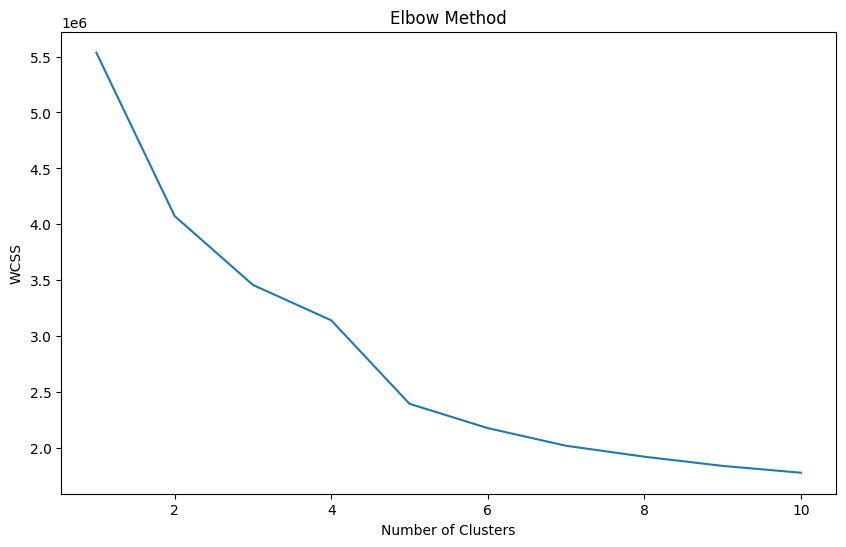

In [11]:
# Perform elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Based on the elbow graph, choose the optimal number of clusters (e.g., 5)
# k = 5

## doing wit 3,4,5

  Ticker        Date      Sector  Cluster
0      A  2023-09-26  Healthcare        2
1      A  2023-09-27  Healthcare        2
2      A  2023-09-28  Healthcare        2
3      A  2023-09-29  Healthcare        2
4      A  2023-10-02  Healthcare        2


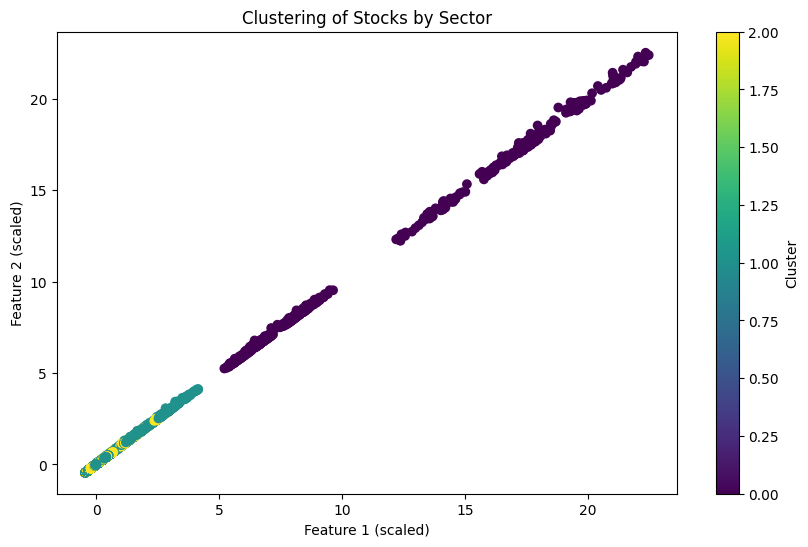

In [35]:
# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # You can choose the number of clusters
merged_data['Cluster'] = kmeans.fit_predict(scaled_features)

# Display the first few rows with the assigned cluster
print(merged_data[['Ticker', 'Date', 'Sector', 'Cluster']].head())

# Optionally visualize the clusters (using only 2D for simplicity)
plt.figure(figsize=(10, 6))
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=merged_data['Cluster'], cmap='viridis')
plt.title('Clustering of Stocks by Sector')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.colorbar(label='Cluster')
plt.show()


  Ticker        Date      Sector  Cluster
0      A  2023-09-26  Healthcare        2
1      A  2023-09-27  Healthcare        2
2      A  2023-09-28  Healthcare        2
3      A  2023-09-29  Healthcare        2
4      A  2023-10-02  Healthcare        2


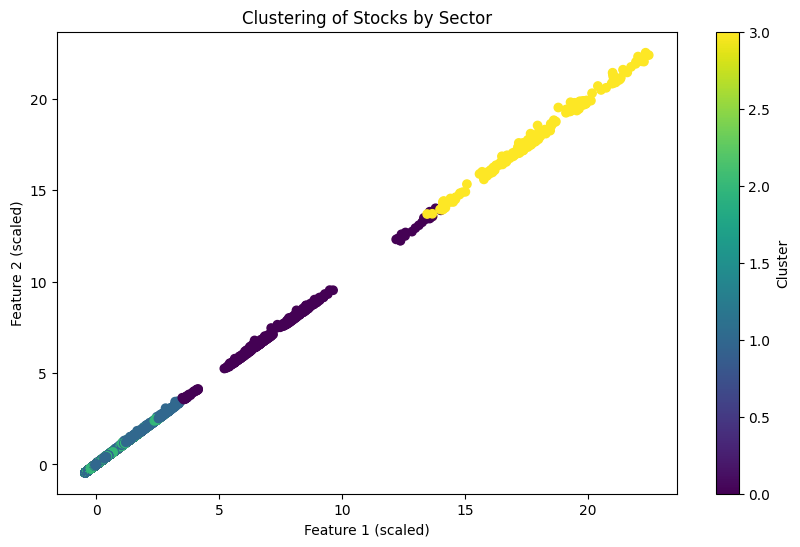

In [36]:
kmeans = KMeans(n_clusters=4, random_state=42)  # You can choose the number of clusters
merged_data['Cluster'] = kmeans.fit_predict(scaled_features)

# Display the first few rows with the assigned cluster
print(merged_data[['Ticker', 'Date', 'Sector', 'Cluster']].head())

# Optionally visualize the clusters (using only 2D for simplicity)
plt.figure(figsize=(10, 6))
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=merged_data['Cluster'], cmap='viridis')
plt.title('Clustering of Stocks by Sector')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.colorbar(label='Cluster')
plt.show()


  Ticker        Date      Sector  Cluster
0      A  2023-09-26  Healthcare        2
1      A  2023-09-27  Healthcare        2
2      A  2023-09-28  Healthcare        2
3      A  2023-09-29  Healthcare        2
4      A  2023-10-02  Healthcare        2


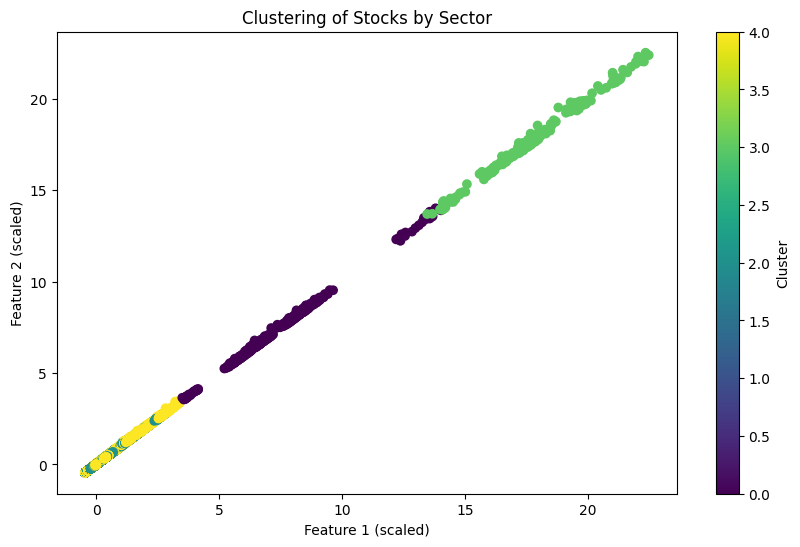

In [37]:
kmeans = KMeans(n_clusters=5, random_state=42)  # You can choose the number of clusters
merged_data['Cluster'] = kmeans.fit_predict(scaled_features)

# Display the first few rows with the assigned cluster
print(merged_data[['Ticker', 'Date', 'Sector', 'Cluster']].head())

# Optionally visualize the clusters (using only 2D for simplicity)
plt.figure(figsize=(10, 6))
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=merged_data['Cluster'], cmap='viridis')
plt.title('Clustering of Stocks by Sector')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.colorbar(label='Cluster')
plt.show()


  Ticker        Date      Sector  Cluster
0      A  2023-09-26  Healthcare        2
1      A  2023-09-27  Healthcare        2
2      A  2023-09-28  Healthcare        2
3      A  2023-09-29  Healthcare        2
4      A  2023-10-02  Healthcare        2


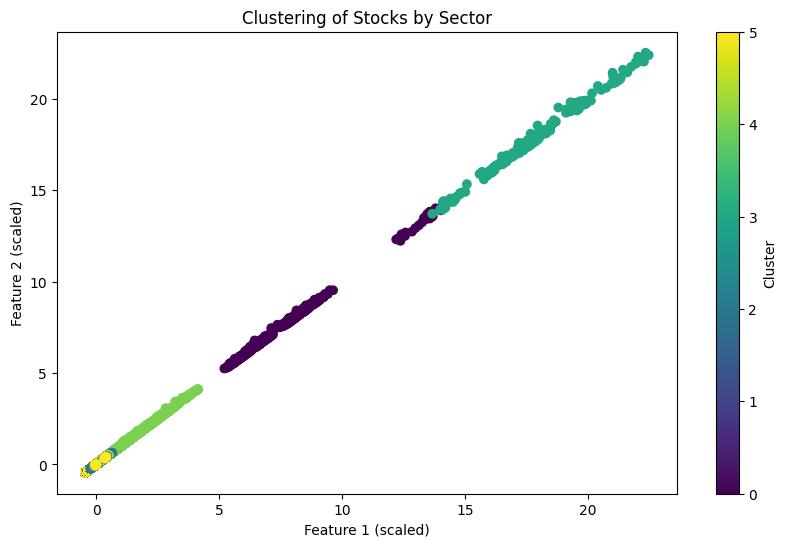

In [38]:
kmeans = KMeans(n_clusters=6, random_state=42)  # You can choose the number of clusters
merged_data['Cluster'] = kmeans.fit_predict(scaled_features)

# Display the first few rows with the assigned cluster
print(merged_data[['Ticker', 'Date', 'Sector', 'Cluster']].head())

# Optionally visualize the clusters (using only 2D for simplicity)
plt.figure(figsize=(10, 6))
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=merged_data['Cluster'], cmap='viridis')
plt.title('Clustering of Stocks by Sector')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.colorbar(label='Cluster')
plt.show()


# Going with 5

In [12]:
merged_data.columns

Index(['Date', 'Ticker', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Returns', 'SMA_50', 'EMA_20', 'RSI', 'BB_upper', 'BB_lower',
       'Volume_MA_5', 'Label', 'Close_Pct_Change', 'Volume_Pct_Change', 'MACD',
       'MACD_Signal', 'BB_Pct', 'Close_Lag_1', 'Volume_Lag_1', 'Close_Lag_2',
       'Volume_Lag_2', 'Close_Lag_3', 'Volume_Lag_3', 'Close_Lag_4',
       'Volume_Lag_4', 'Close_Lag_5', 'Volume_Lag_5', 'Returns_Rolling_Mean',
       'Returns_Rolling_Std', 'RSI_14', 'RSI_28', 'ATR', 'OBV', 'Momentum',
       'DayOfWeek', 'Month', '52W_High', '52W_Low', 'Pct_From_52W_High',
       'Pct_From_52W_Low', 'Label_Encoded', 'Predicted_Label',
       'Label_Encoded_inverse', 'Label_5', 'YearMonth', 'RSI_SMA_ratio',
       'MACD_SMA_ratio', 'BB_width', 'Price_to_SMA_ratio', 'Sector',
       'Sector_Encoded'],
      dtype='object')

  Ticker        Date      Sector  Cluster
0      A  2023-09-26  Healthcare        2
1      A  2023-09-27  Healthcare        2
2      A  2023-09-28  Healthcare        2
3      A  2023-09-29  Healthcare        2
4      A  2023-10-02  Healthcare        2


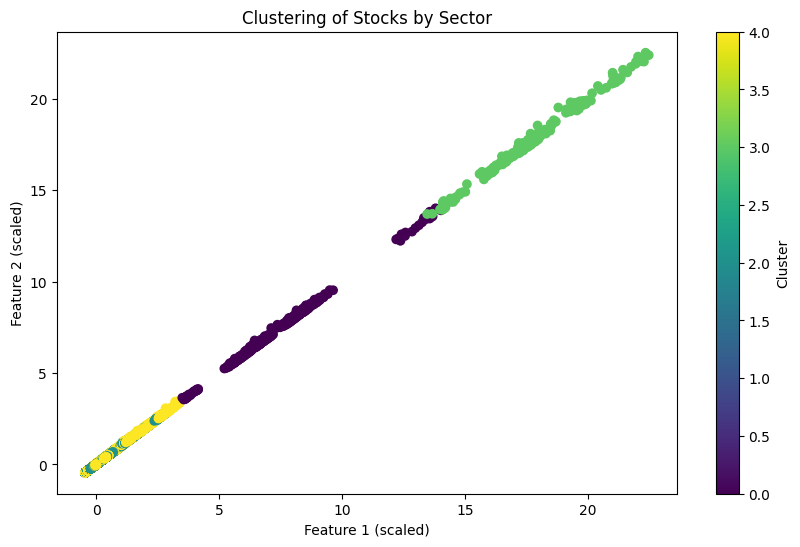

In [13]:
kmeans = KMeans(n_clusters=5, random_state=42)  # You can choose the number of clusters
merged_data['Cluster'] = kmeans.fit_predict(scaled_features)

# Display the first few rows with the assigned cluster
print(merged_data[['Ticker', 'Date', 'Sector', 'Cluster']].head())

# Optionally visualize the clusters (using only 2D for simplicity)
plt.figure(figsize=(10, 6))
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=merged_data['Cluster'], cmap='viridis')
plt.title('Clustering of Stocks by Sector')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.colorbar(label='Cluster')
plt.show()


In [14]:
# After clustering, add cluster assignments back to the original DataFrame
merged_data['Cluster'] = kmeans.labels_

# Group by Cluster to see stocks in each cluster
clustered_stocks = merged_data.groupby('Cluster')['Ticker'].unique()
print(clustered_stocks)

Cluster
0                               [AZO, BKNG, FICO, NVR]
1                                         [NVDA, SMCI]
2    [A, AAPL, ABBV, ABNB, ABT, ACGL, ACN, ADBE, AD...
3                                                [NVR]
4    [A, AAPL, ABBV, ABNB, ABT, ACGL, ACN, ADBE, AD...
Name: Ticker, dtype: object


In [17]:
merged_data.shape

(125775, 56)

In [16]:

CompanySymbolWeight = ['AAPL', 'MSFT', 'NVDA', 'AMZN', 'META', 'GOOGL', 'BRK.B', 'GOOG', 'AVGO', 'LLY', 'TSLA', 'JPM', 'UNH', 'XOM', 'V', 'MA', 'HD', 'PG', 'COST', 'JNJ']
cluster_assignments = merged_data[merged_data['Ticker'].isin(CompanySymbolWeight)]
cluster_assignments.shape

(4826, 56)

In [22]:
cluster_assignments.Cluster.value_counts()

Cluster
4    2813
2    1759
1     254
Name: count, dtype: int64

## Creating Visualisation

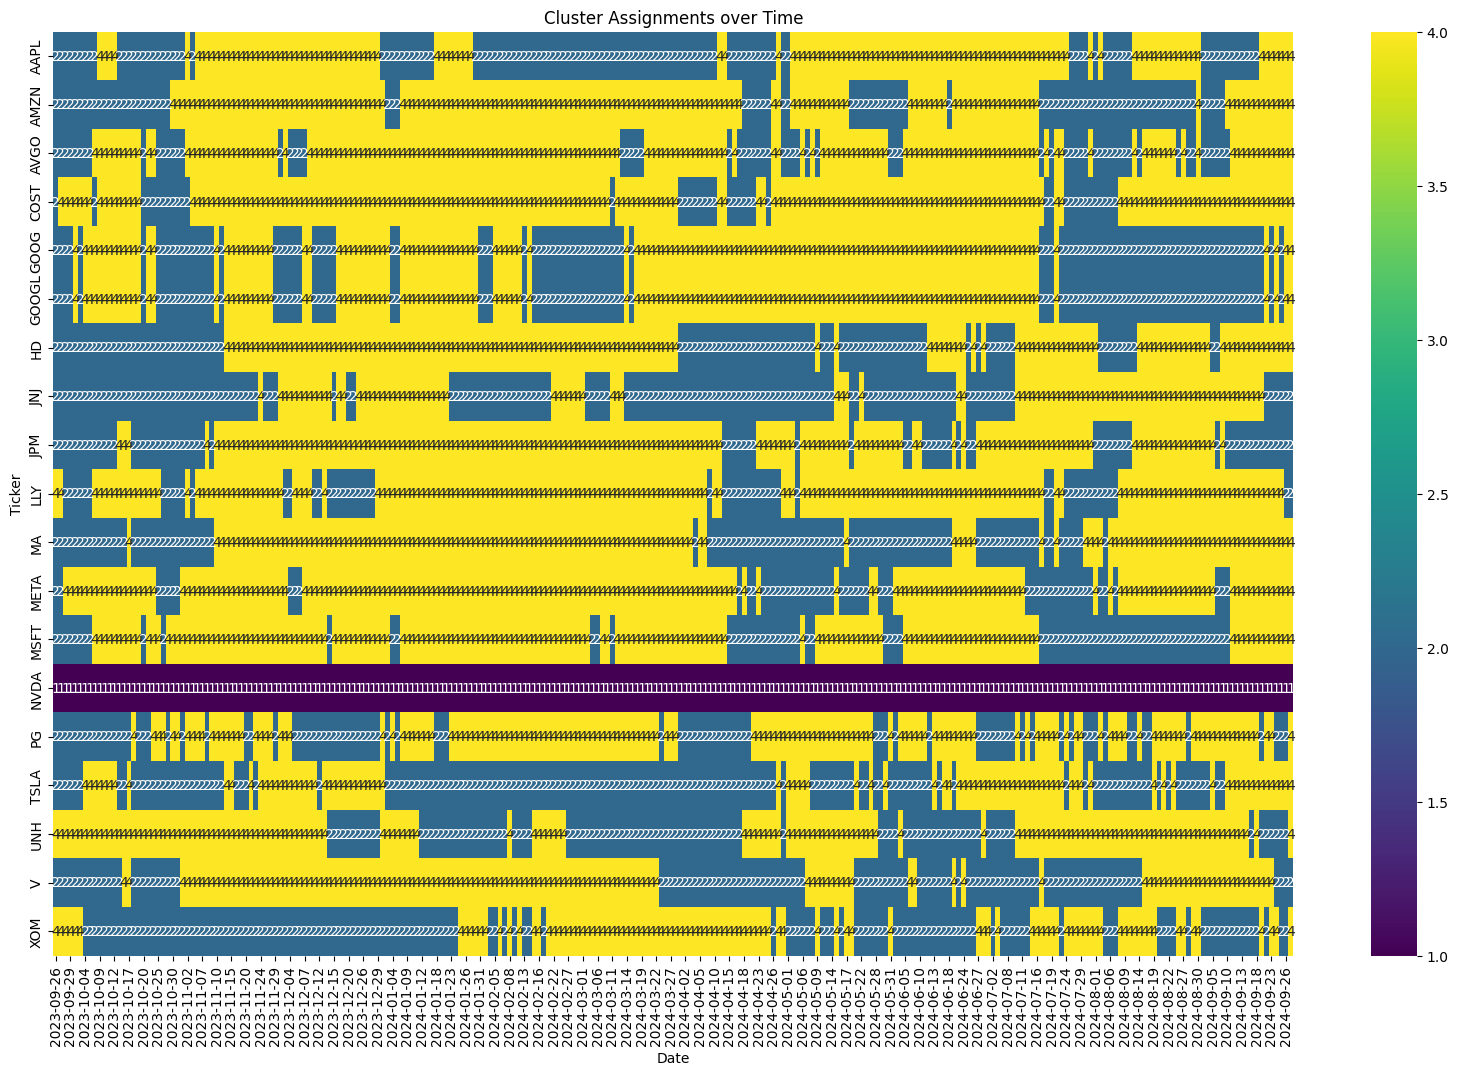

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pivot the data to create a matrix
pivot_data = cluster_assignments.pivot_table(index='Ticker', columns='Date', values='Cluster', aggfunc='max')

# Create a heatmap
plt.figure(figsize=(20,12))
sns.heatmap(pivot_data, cmap='viridis', annot=True, fmt='d')
plt.title('Cluster Assignments over Time')
plt.xlabel('Date')
plt.ylabel('Ticker')
plt.show()

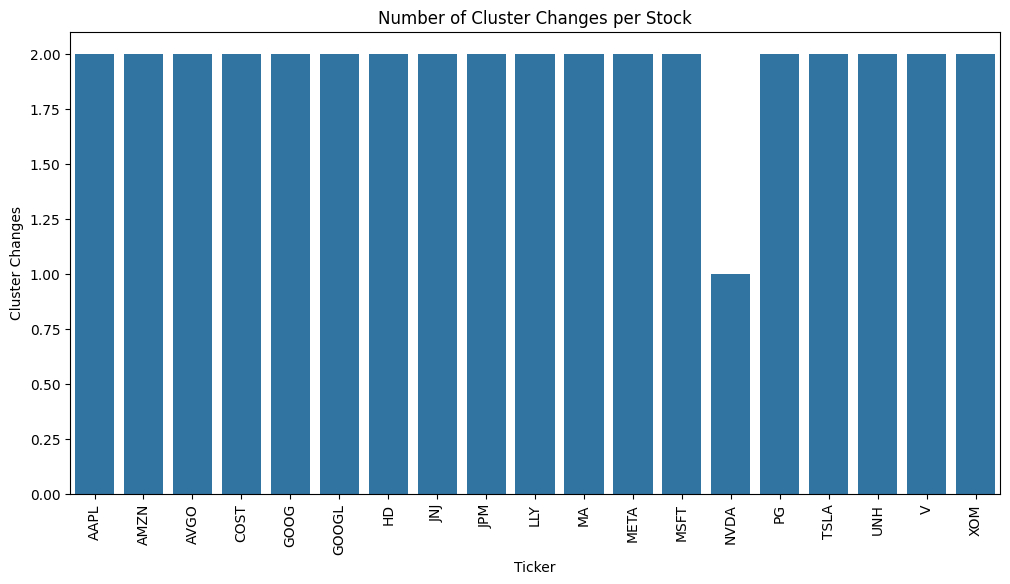

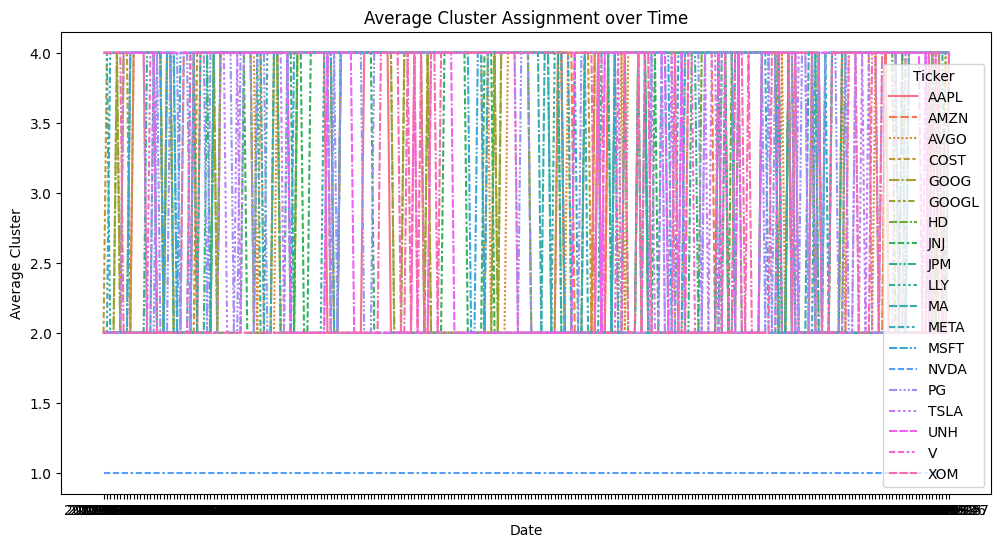

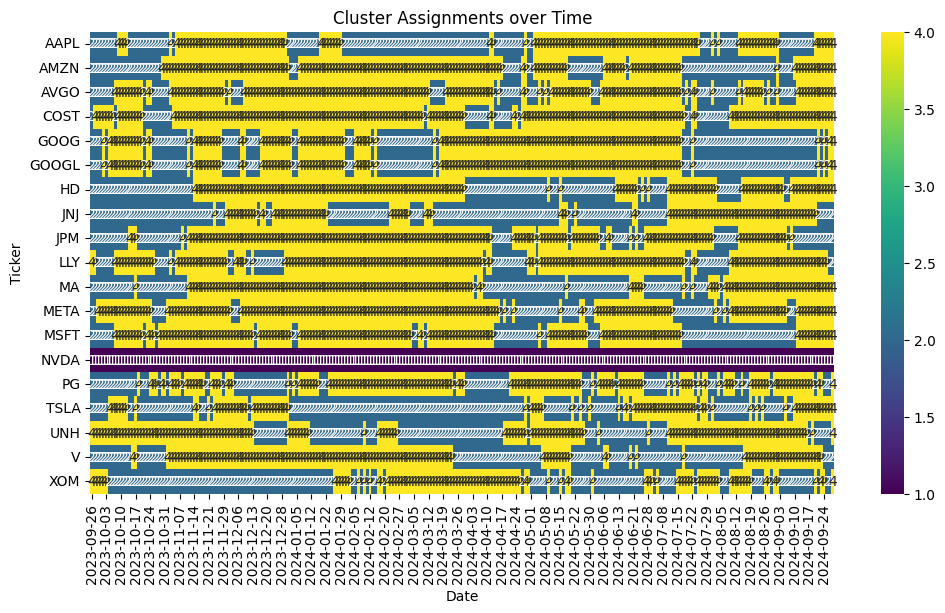

In [23]:
# Create a pivot table to count the number of cluster changes for each stock
cluster_changes = cluster_assignments.groupby('Ticker')['Cluster'].nunique().reset_index()
cluster_changes.columns = ['Ticker', 'Cluster Changes']

# Create a bar chart to show the number of cluster changes for each stock
plt.figure(figsize=(12, 6))
sns.barplot(x='Ticker', y='Cluster Changes', data=cluster_changes)
plt.title('Number of Cluster Changes per Stock')
plt.xlabel('Ticker')
plt.ylabel('Cluster Changes')
plt.xticks(rotation=90)
plt.show()

# Create a line chart to show the average cluster assignment for each stock over time
avg_cluster_assignments = cluster_assignments.groupby(['Ticker', 'Date'])['Cluster'].mean().reset_index()
avg_cluster_assignments = avg_cluster_assignments.pivot_table(index='Date', columns='Ticker', values='Cluster')

plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_cluster_assignments)
plt.title('Average Cluster Assignment over Time')
plt.xlabel('Date')
plt.ylabel('Average Cluster')
plt.show()

# Create a heatmap to show the cluster assignments over time
pivot_data = cluster_assignments.pivot_table(index='Ticker', columns='Date', values='Cluster', aggfunc='max')

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_data, cmap='viridis', annot=True, fmt='d')
plt.title('Cluster Assignments over Time')
plt.xlabel('Date')
plt.ylabel('Ticker')
plt.show()

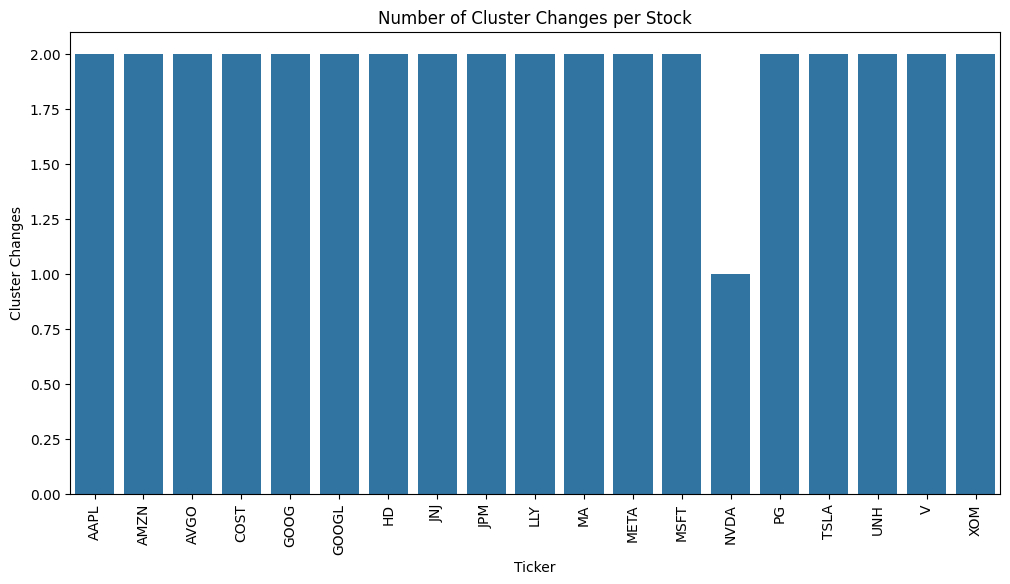

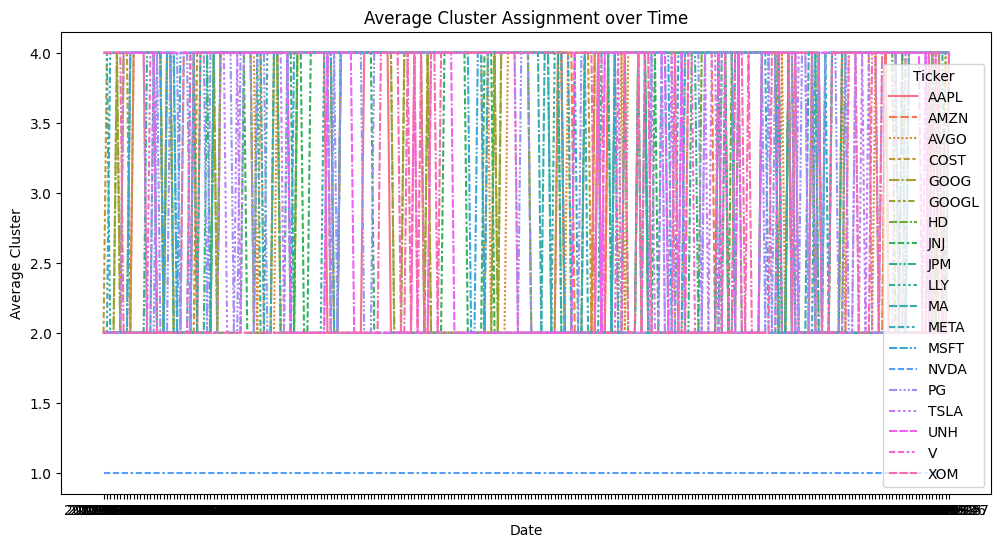

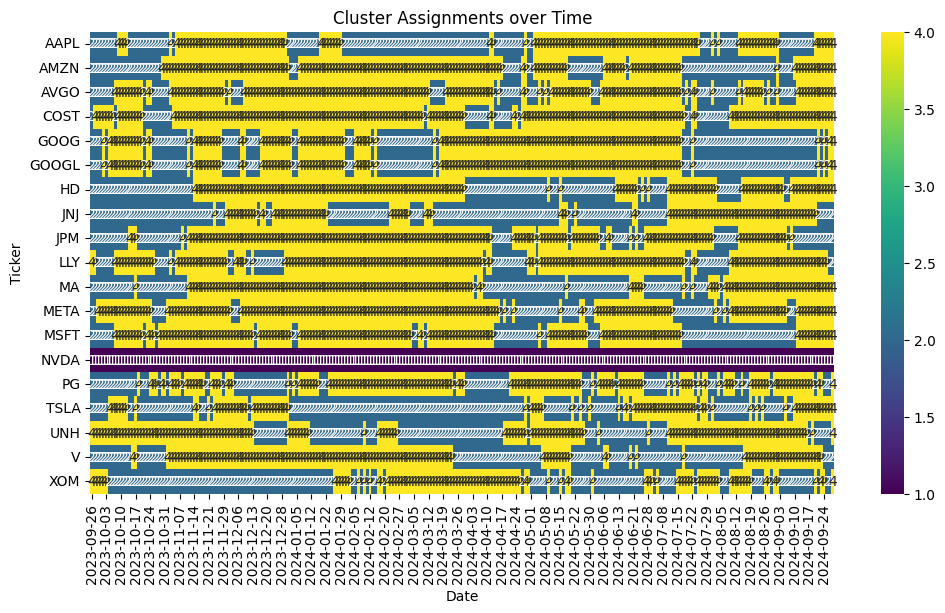

ValueError: Unknown format code 'd' for object of type 'float'

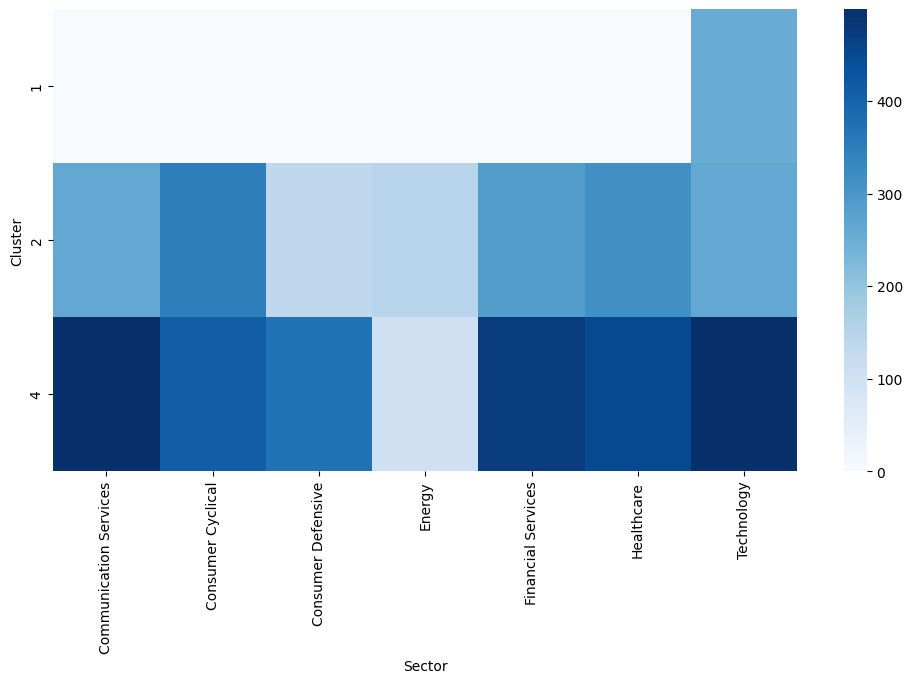

In [24]:
# Create a pivot table to count the number of cluster changes for each stock
cluster_changes = cluster_assignments.groupby('Ticker')['Cluster'].nunique().reset_index()
cluster_changes.columns = ['Ticker', 'Cluster Changes']

# Create a bar chart to show the number of cluster changes for each stock
plt.figure(figsize=(12, 6))
sns.barplot(x='Ticker', y='Cluster Changes', data=cluster_changes)
plt.title('Number of Cluster Changes per Stock')
plt.xlabel('Ticker')
plt.ylabel('Cluster Changes')
plt.xticks(rotation=90)
plt.show()

# Create a line chart to show the average cluster assignment for each stock over time
avg_cluster_assignments = cluster_assignments.groupby(['Ticker', 'Date'])['Cluster'].mean().reset_index()
avg_cluster_assignments = avg_cluster_assignments.pivot_table(index='Date', columns='Ticker', values='Cluster')

plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_cluster_assignments)
plt.title('Average Cluster Assignment over Time')
plt.xlabel('Date')
plt.ylabel('Average Cluster')
plt.show()

# Create a heatmap to show the cluster assignments over time
pivot_data = cluster_assignments.pivot_table(index='Ticker', columns='Date', values='Cluster', aggfunc='max')

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_data, cmap='viridis', annot=True, fmt='d')
plt.title('Cluster Assignments over Time')
plt.xlabel('Date')
plt.ylabel('Ticker')
plt.show()

# Create a heatmap to show the sector distribution across clusters
sector_distribution = cluster_assignments.groupby(['Cluster', 'Sector']).size().unstack().fillna(0)

plt.figure(figsize=(12, 6))
sns.heatmap(sector_distribution, cmap='Blues', annot=True, fmt='d')
plt.title('Sector Distribution across Clusters')
plt.xlabel('Sector')
plt.ylabel('Cluster')
plt.show()

# Create a bar chart to show the top sectors in each cluster
top_sectors = cluster_assignments.groupby(['Cluster', 'Sector']).size().reset_index(name='count')
top_sectors = top_sectors.sort_values(by='count', ascending=False).groupby('Cluster').head(3)

plt.figure(figsize=(12, 6))
sns.barplot(x='Sector', y='count', hue='Cluster', data=top_sectors)
plt.title('Top Sectors in Each Cluster')
plt.xlabel('Sector')
plt.ylabel('Count')
plt.show()

In [26]:
cluster_assignments.head(2).to_clipboard(sep='|')

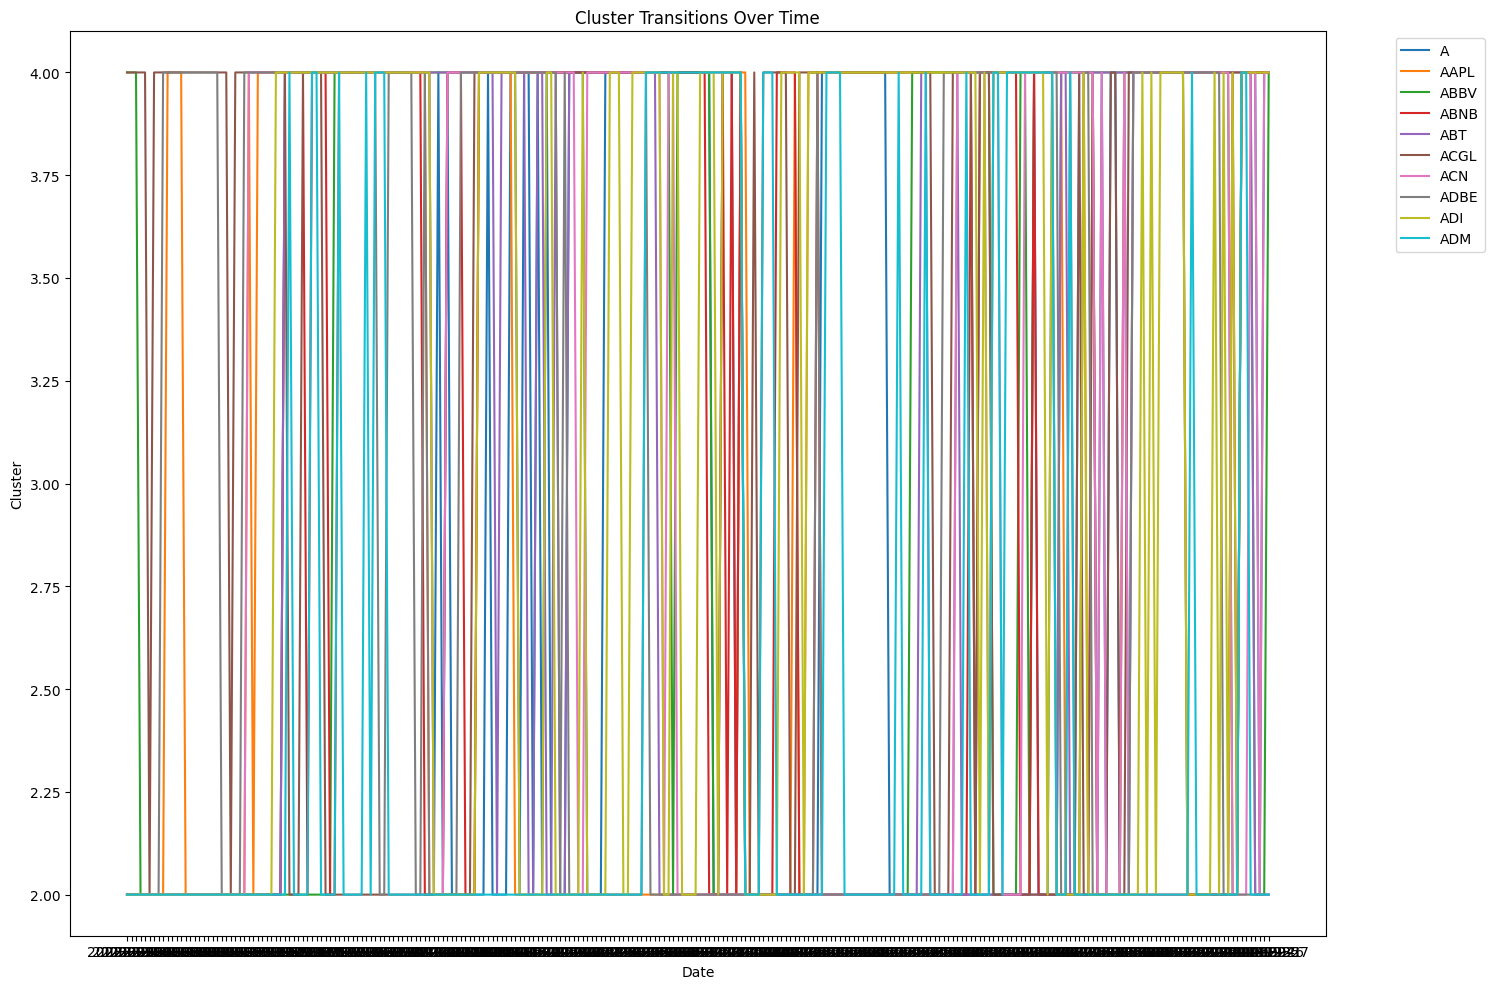

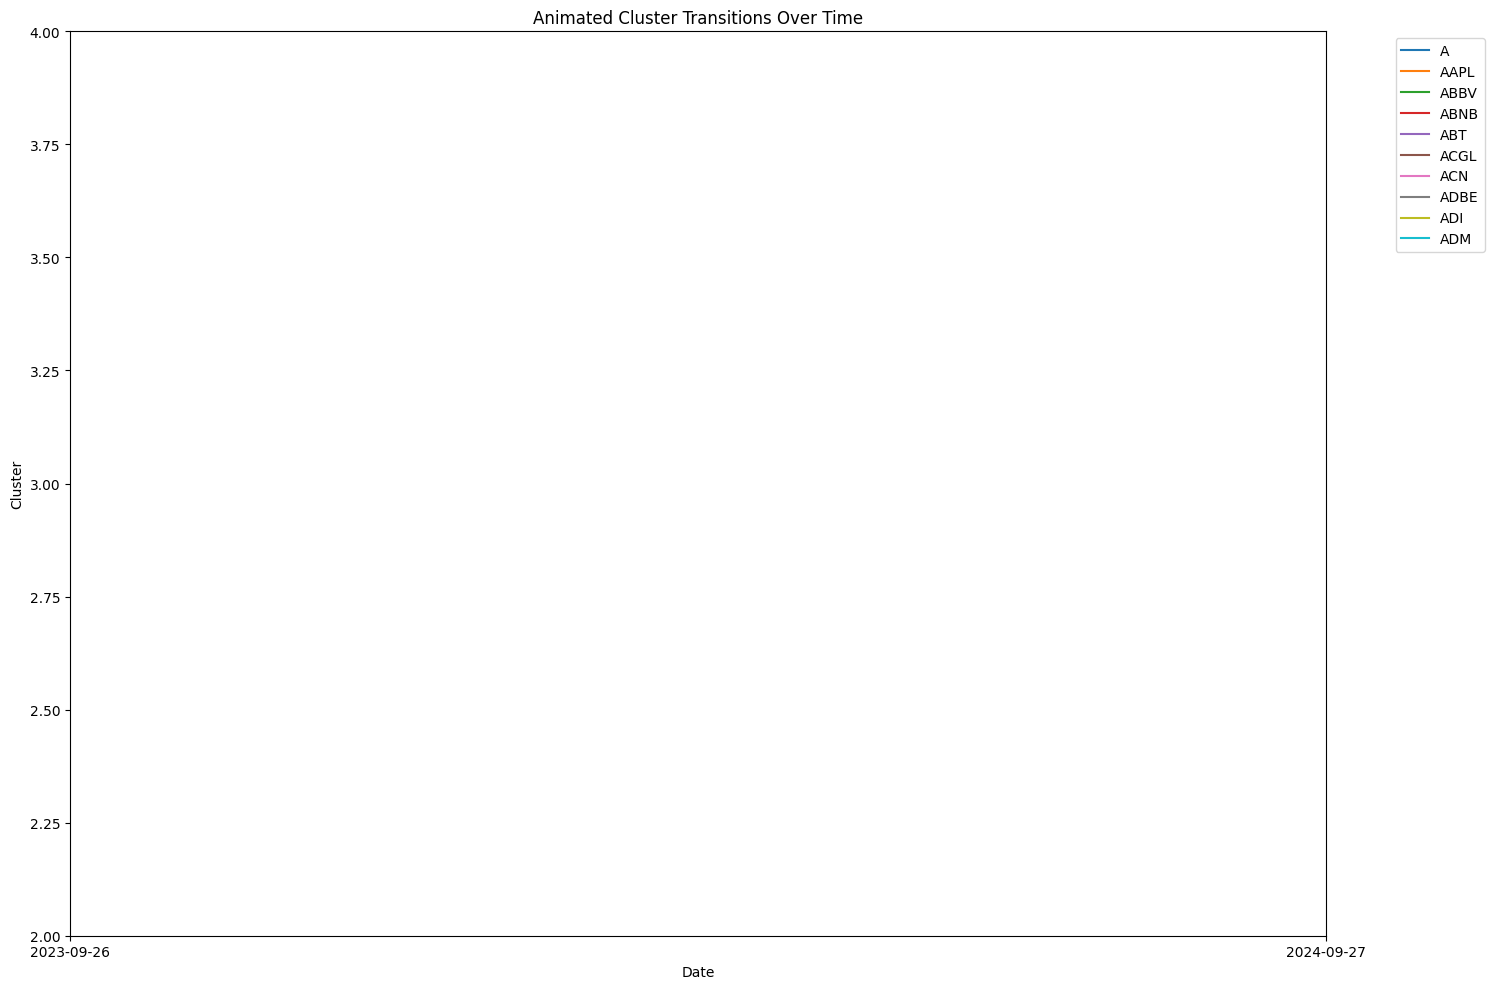

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def aggregate_clusters(df, stock_col='Ticker', date_col='Date', cluster_col='Cluster'):
    """
    Aggregate cluster assignments for each stock using mode.
    
    :param df: DataFrame containing stock data with cluster assignments
    :param stock_col: Name of the column containing stock tickers
    :param date_col: Name of the column containing dates
    :param cluster_col: Name of the column containing cluster assignments
    :return: DataFrame with aggregated cluster assignments
    """
    # Calculate mode cluster for each stock
    mode_clusters = merged_data.groupby('Ticker')['Cluster'].agg(lambda x: x.value_counts().idxmax())

    # Calculate cluster frequency for each stock
    cluster_freq = merged_data.groupby('Ticker')['Cluster'].value_counts(normalize=True).unstack(fill_value=0)
    
    return pd.concat([mode_clusters, cluster_freq], axis=1)

def plot_cluster_transitions(df, stock_col='Ticker', date_col='Date', cluster_col='Cluster', n_stocks=10):
    """
    Plot cluster transitions for a subset of stocks over time.
    
    :param df: DataFrame containing stock data with cluster assignments
    :param stock_col: Name of the column containing stock tickers
    :param date_col: Name of the column containing dates
    :param cluster_col: Name of the column containing cluster assignments
    :param n_stocks: Number of stocks to plot
    """
    # Select a subset of stocks
    stocks = df[stock_col].unique()[:n_stocks]
    
    # Create a pivot table
    pivot = df[df[stock_col].isin(stocks)].pivot(index=date_col, columns=stock_col, values=cluster_col)
    
    # Plot
    plt.figure(figsize=(15, 10))
    for stock in stocks:
        plt.plot(pivot.index, pivot[stock], label=stock)
    
    plt.title('Cluster Transitions Over Time')
    plt.xlabel('Date')
    plt.ylabel('Cluster')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

def animate_cluster_transitions(df, stock_col='Ticker', date_col='Date', cluster_col='Cluster', n_stocks=10):
    """
    Create an animation of cluster transitions for a subset of stocks over time.
    
    :param df: DataFrame containing stock data with cluster assignments
    :param stock_col: Name of the column containing stock tickers
    :param date_col: Name of the column containing dates
    :param cluster_col: Name of the column containing cluster assignments
    :param n_stocks: Number of stocks to animate
    """
    from matplotlib.animation import FuncAnimation
    
    # Select a subset of stocks
    stocks = df[stock_col].unique()[:n_stocks]
    
    # Create a pivot table
    pivot = df[df[stock_col].isin(stocks)].pivot(index=date_col, columns=stock_col, values=cluster_col)
    
    # Set up the plot
    fig, ax = plt.subplots(figsize=(15, 10))
    lines = [ax.plot([], [], label=stock)[0] for stock in stocks]
    
    def init():
        ax.set_xlim(pivot.index.min(), pivot.index.max())
        ax.set_ylim(pivot.min().min(), pivot.max().max())
        return lines

    def animate(i):
        for line, stock in zip(lines, stocks):
            line.set_data(pivot.index[:i], pivot[stock][:i])
        return lines

    anim = FuncAnimation(fig, animate, init_func=init, frames=len(pivot), interval=100, blit=True)
    
    plt.title('Animated Cluster Transitions Over Time')
    plt.xlabel('Date')
    plt.ylabel('Cluster')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    
    return anim

def main(df):
    # Aggregate clusters
    aggregated_clusters = aggregate_clusters(df)
    
    # Plot cluster transitions
    plot_cluster_transitions(df)
    
    # Create animation
    anim = animate_cluster_transitions(df)
    
    return aggregated_clusters, anim

# Assuming 'df' is your DataFrame with stock data and cluster assignments
aggregated_clusters, animation = main(merged_data)

<Figure size 1200x800 with 0 Axes>

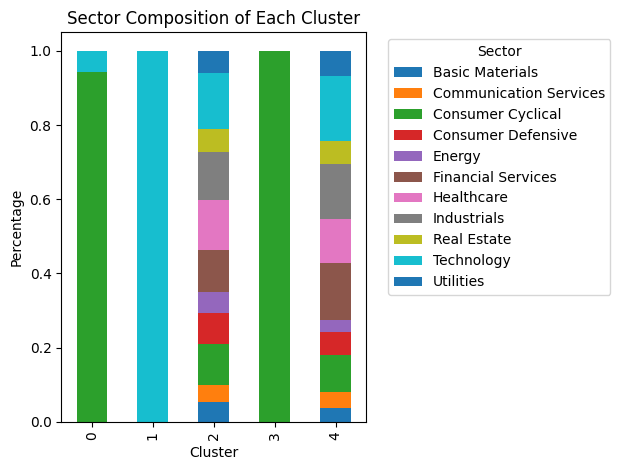

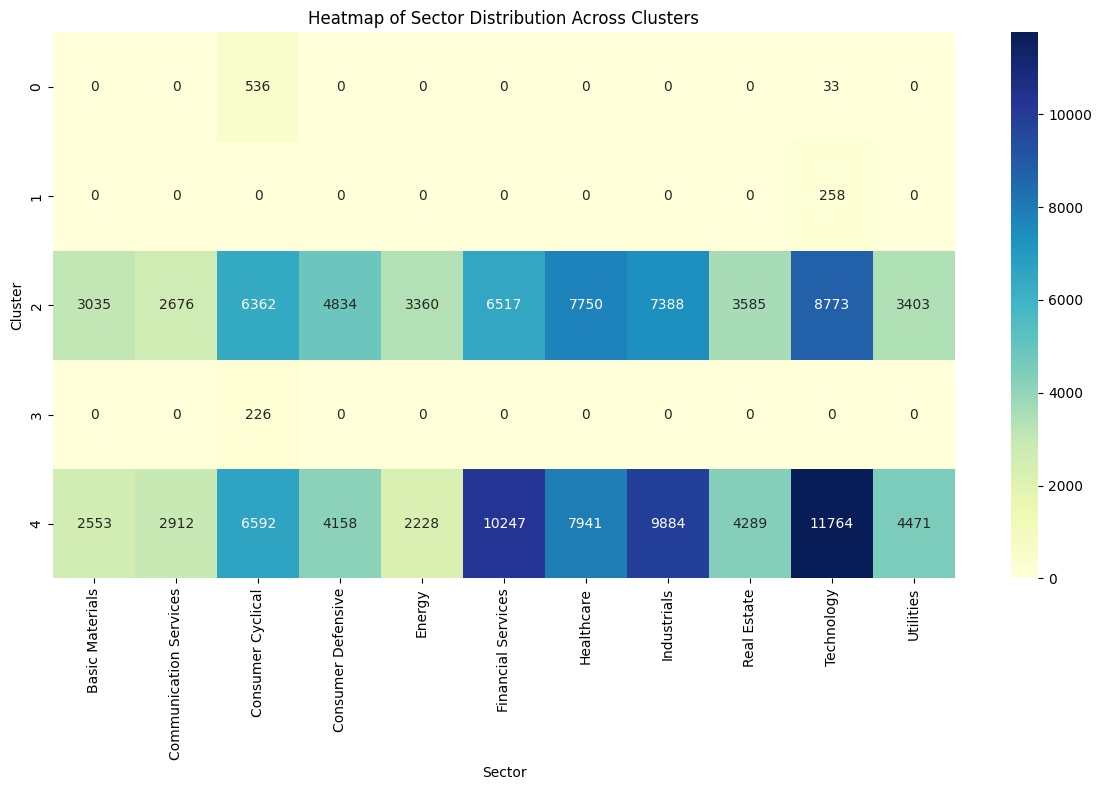

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_cluster_composition(df, cluster_col='Cluster', sector_col='Sector'):
    """
    Analyze the composition of each cluster by sector.
    
    :param df: DataFrame containing cluster assignments and sector information
    :param cluster_col: Name of the column containing cluster assignments
    :param sector_col: Name of the column containing sector information
    :return: DataFrame with sector distribution for each cluster
    """
    cluster_composition = df.groupby([cluster_col, sector_col]).size().unstack(fill_value=0)
    cluster_composition_pct = cluster_composition.div(cluster_composition.sum(axis=1), axis=0)
    return cluster_composition_pct

def plot_cluster_composition(cluster_composition_pct):
    """
    Plot the sector composition of each cluster.
    
    :param cluster_composition_pct: DataFrame with sector distribution for each cluster
    """
    plt.figure(figsize=(12, 8))
    cluster_composition_pct.plot(kind='bar', stacked=True)
    plt.title('Sector Composition of Each Cluster')
    plt.xlabel('Cluster')
    plt.ylabel('Percentage')
    plt.legend(title='Sector', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

def plot_heatmap(df, cluster_col='Cluster', sector_col='Sector'):
    """
    Plot a heatmap of sector distribution across clusters.
    
    :param df: DataFrame containing cluster assignments and sector information
    :param cluster_col: Name of the column containing cluster assignments
    :param sector_col: Name of the column containing sector information
    """
    cluster_sector_counts = pd.crosstab(df[cluster_col], df[sector_col])
    plt.figure(figsize=(12, 8))
    sns.heatmap(cluster_sector_counts, annot=True, cmap='YlGnBu', fmt='d')
    plt.title('Heatmap of Sector Distribution Across Clusters')
    plt.xlabel('Sector')
    plt.ylabel('Cluster')
    plt.tight_layout()
    plt.show()

def main(df):
    # Analyze cluster composition
    cluster_composition_pct = analyze_cluster_composition(df)
    
    # Plot cluster composition
    plot_cluster_composition(cluster_composition_pct)
    
    # Plot heatmap
    plot_heatmap(df)
    
    return cluster_composition_pct

# Assuming 'df' is your DataFrame with cluster assignments and sector information
cluster_composition = main(merged_data)

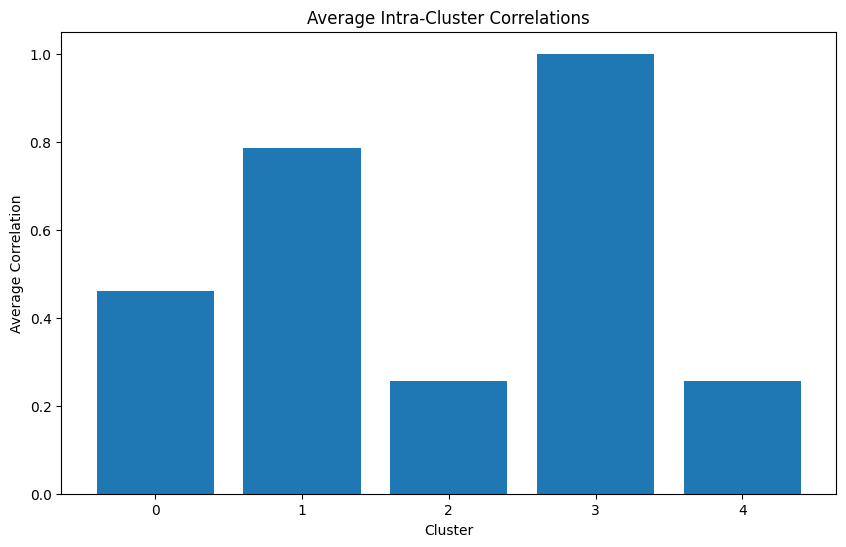

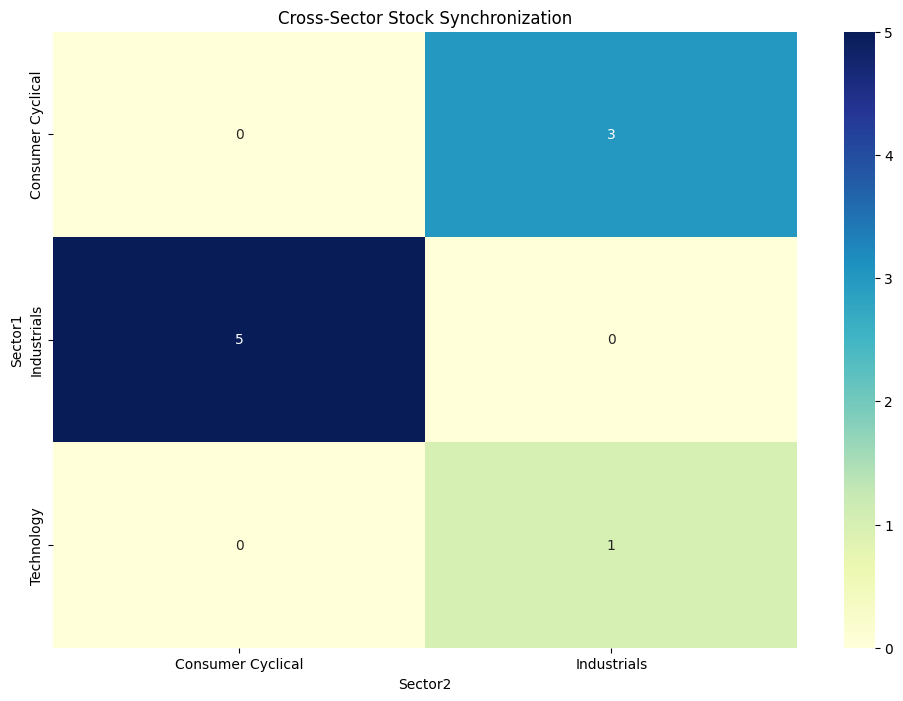

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr

def calculate_correlations(df, price_col='Close', date_col='Date', stock_col='Ticker'):
    """
    Calculate pairwise correlations between stocks based on their price movements.
    
    :param df: DataFrame containing stock data
    :param price_col: Name of the column containing price data
    :param date_col: Name of the column containing dates
    :param stock_col: Name of the column containing stock tickers
    :return: Correlation matrix
    """
    pivot_df = df.pivot(index=date_col, columns=stock_col, values=price_col)
    return pivot_df.pct_change().corr(method='spearman')

def analyze_intra_cluster_correlations(df, corr_matrix, cluster_col='Cluster'):
    """
    Analyze correlations within each cluster.
    
    :param df: DataFrame containing stock data with cluster assignments
    :param corr_matrix: Correlation matrix of stocks
    :param cluster_col: Name of the column containing cluster assignments
    :return: Dictionary with average correlation for each cluster
    """
    cluster_correlations = {}
    for cluster in df[cluster_col].unique():
        cluster_stocks = df[df[cluster_col] == cluster]['Ticker'].unique()
        cluster_corr = corr_matrix.loc[cluster_stocks, cluster_stocks]
        cluster_correlations[cluster] = cluster_corr.mean().mean()
    return cluster_correlations

def identify_cross_sector_sync(df, corr_matrix, threshold=0.7, sector_col='Sector', stock_col='Ticker'):
    """
    Identify stocks that move in sync across different sectors.
    
    :param df: DataFrame containing stock data with sector information
    :param corr_matrix: Correlation matrix of stocks
    :param threshold: Correlation threshold to consider stocks as moving in sync
    :param sector_col: Name of the column containing sector information
    :param stock_col: Name of the column containing stock tickers
    :return: DataFrame with pairs of stocks from different sectors that move in sync
    """
    high_corr_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            if corr_matrix.iloc[i, j] >= threshold:
                stock1, stock2 = corr_matrix.columns[i], corr_matrix.columns[j]
                sector1 = df[df[stock_col] == stock1][sector_col].iloc[0]
                sector2 = df[df[stock_col] == stock2][sector_col].iloc[0]
                if sector1 != sector2:
                    high_corr_pairs.append((stock1, stock2, sector1, sector2, corr_matrix.iloc[i, j]))
    
    return pd.DataFrame(high_corr_pairs, columns=['Stock1', 'Stock2', 'Sector1', 'Sector2', 'Correlation'])

def visualize_cluster_correlations(cluster_correlations):
    """
    Visualize average correlations within each cluster.
    
    :param cluster_correlations: Dictionary with average correlation for each cluster
    """
    plt.figure(figsize=(10, 6))
    plt.bar(cluster_correlations.keys(), cluster_correlations.values())
    plt.title('Average Intra-Cluster Correlations')
    plt.xlabel('Cluster')
    plt.ylabel('Average Correlation')
    plt.show()

def visualize_cross_sector_sync(cross_sector_df):
    """
    Visualize cross-sector synchronization.
    
    :param cross_sector_df: DataFrame with pairs of stocks from different sectors that move in sync
    """
    plt.figure(figsize=(12, 8))
    sector_pairs = cross_sector_df.groupby(['Sector1', 'Sector2']).size().unstack(fill_value=0)
    sns.heatmap(sector_pairs, annot=True, cmap='YlGnBu', fmt='d')
    plt.title('Cross-Sector Stock Synchronization')
    plt.show()

def main(df):
    # Calculate correlations
    corr_matrix = calculate_correlations(df)
    
    # Analyze intra-cluster correlations
    cluster_correlations = analyze_intra_cluster_correlations(df, corr_matrix)
    visualize_cluster_correlations(cluster_correlations)
    
    # Identify cross-sector synchronization
    cross_sector_sync = identify_cross_sector_sync(df, corr_matrix)
    visualize_cross_sector_sync(cross_sector_sync)
    
    return cluster_correlations, cross_sector_sync

# Assuming 'df' is your DataFrame with stock data, cluster assignments, and sector information
cluster_correlations, cross_sector_sync = main(merged_data)

In [56]:
import pandas as pd

# Assuming 'merged_data' is your DataFrame
numerical_features = merged_data.select_dtypes(include=[np.number]).columns.tolist()
numerical_features.remove('Cluster')  # Remove 'Cluster' from the list if it's included

# Calculate summary statistics for each numerical feature within each cluster
cluster_summary = merged_data.groupby('Cluster')[numerical_features].describe()
cluster_summary

Open                                                     \
           count         mean         std          min          25%   
Cluster                                                               
0          569.0  3245.308474  784.051988  1677.469971  2779.800049   
1          258.0    83.939546   30.224888    40.450001    49.553749   
2        57683.0   145.601556  145.826624     6.670000    54.275000   
3          226.0  7670.830270  859.647502  5885.529785  7177.125000   
4        67039.0   190.872159  199.212268     7.380000    69.795002   

                                                   High               ...  \
                 50%          75%          max    count         mean  ...   
Cluster                                                               ...   
0        3122.270020  3603.800049  6120.500000    569.0  3277.045548  ...   
1          87.084999   113.672752   139.800003    258.0    85.598426  ...   
2         101.300003   188.839996  1418.000000  57683.0   146.956804  ...   
3        7618.455078  8019.689941  9693.620117    226.0  7757.380045  ...   
4         126.989998   235.950005  1755.800049  67039.0   192.972275  ...   

        Price_to_SMA_ratio           Sector_Encoded                           \
                       75%       max          count      mean       std  min   
Cluster                                                                        
0                 1.060453  1.181297          569.0  2.405975  1.637597  2.0   
1                 1.208213  2.071906          258.0  9.000000  0.000000  9.0   
2                 0.991848  1.121352        57683.0  5.474923  2.886635  0.0   
3                 1.088493  1.150413          226.0  2.000000  0.000000  2.0   
4                 1.085741  2.358334        67039.0  5.824207  2.809476  0.0   

                              
         25%  50%  75%   max  
Cluster                       
0        2.0  2.0  2.0   9.0  
1        9.0  9.0  9.0   9.0  
2        3.0  6.0  8.0  10.0  
3        2.0  2.0  2.0   2.0  
4        4.0  6.0  8.0  10.0  

[5 rows x 376 columns]

In [58]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Create box plots for each numerical feature across clusters
# plt.figure(figsize=(15, 10))
# for i, feature in enumerate(numerical_features):
#     plt.subplot(len(numerical_features) // 3 + 1, 3, i + 1)
#     sns.boxplot(x='Cluster', y=feature, data=merged_data)
#     plt.title(f'Box plot of {feature} by Cluster')
#     plt.tight_layout()
# plt.show()

In [ ]:
Top 15 Most Important Features:
                feature  importance
38        OBV_SMA_ratio    0.092171
22                  OBV    0.064586
7                EMA_20    0.062153
6                SMA_50    0.057948
12             BB_lower    0.055915
26    Pct_From_52W_High    0.052403
11             BB_upper    0.047227
13          Volume_MA_5    0.046426
27     Pct_From_52W_Low    0.043403
21                  ATR    0.041877
1                  High    0.038728
3                 Close    0.035372
20  Returns_Rolling_Std    0.033913
2                   Low    0.029501
25                Month    0.027602

In [63]:
import pandas as pd

# List of top 15 most important features
important_features = [
    'OBV', 'EMA_20', 'SMA_50', 'BB_lower', 
    'Pct_From_52W_High', 'BB_upper', 'Volume_MA_5', 'Pct_From_52W_Low', 
    'ATR', 'High', 'Close', 'Returns_Rolling_Std', 'Low', 'Month'
]

# Calculate summary statistics for each important feature within each cluster
cluster_summary = merged_data.groupby('Cluster')[important_features].describe()
cluster_summary

OBV                                                          \
           count          mean           std           min           25%   
Cluster                                                                    
0          569.0  4.974969e+06  4.706370e+06 -2.063100e+06  9.853000e+05   
1          258.0  2.604908e+10  5.665305e+09  2.759805e+09  2.083278e+10   
2        57683.0  4.117715e+07  2.564955e+08 -1.299300e+09 -1.675155e+07   
3          226.0  6.153765e+05  1.198342e+05  3.717000e+05  5.250750e+05   
4        67039.0  8.479965e+07  2.647601e+08 -9.378994e+08  4.535600e+06   

                                                    EMA_20               ...  \
                  50%           75%           max    count         mean  ...   
Cluster                                                                  ...   
0        3.408600e+06  9.558100e+06  1.296660e+07    569.0  3223.700175  ...   
1        2.886655e+10  3.019247e+10  3.255242e+10    258.0    81.006760  ...   
2        9.948400e+06  4.411025e+07  3.652420e+09  57683.0   148.487923  ...   
3        6.133000e+05  6.768750e+05  9.004000e+05    226.0  7525.913347  ...   
4        2.611850e+07  7.693020e+07  4.127937e+09  67039.0   185.978975  ...   

                 Low                 Month                                 \
                 75%          max    count      mean       std  min   25%   
Cluster                                                                     
0        3550.010010  6000.000000    569.0  6.833040  3.360169  1.0  4.00   
1         110.895750   132.419998    258.0  6.468992  3.448482  1.0  3.25   
2         186.404999  1388.140015  57683.0  6.565158  3.187815  1.0  4.00   
3        7974.682373  9593.129883    226.0  6.097345  3.375637  1.0  3.00   
4         234.025002  1714.010010  67039.0  6.513671  3.609718  1.0  3.00   

                          
         50%   75%   max  
Cluster                   
0        7.0  10.0  12.0  
1        7.0   9.0  12.0  
2        7.0  10.0  12.0  
3        6.0   9.0  12.0  
4        7.0   9.0  12.0  

[5 rows x 112 columns]

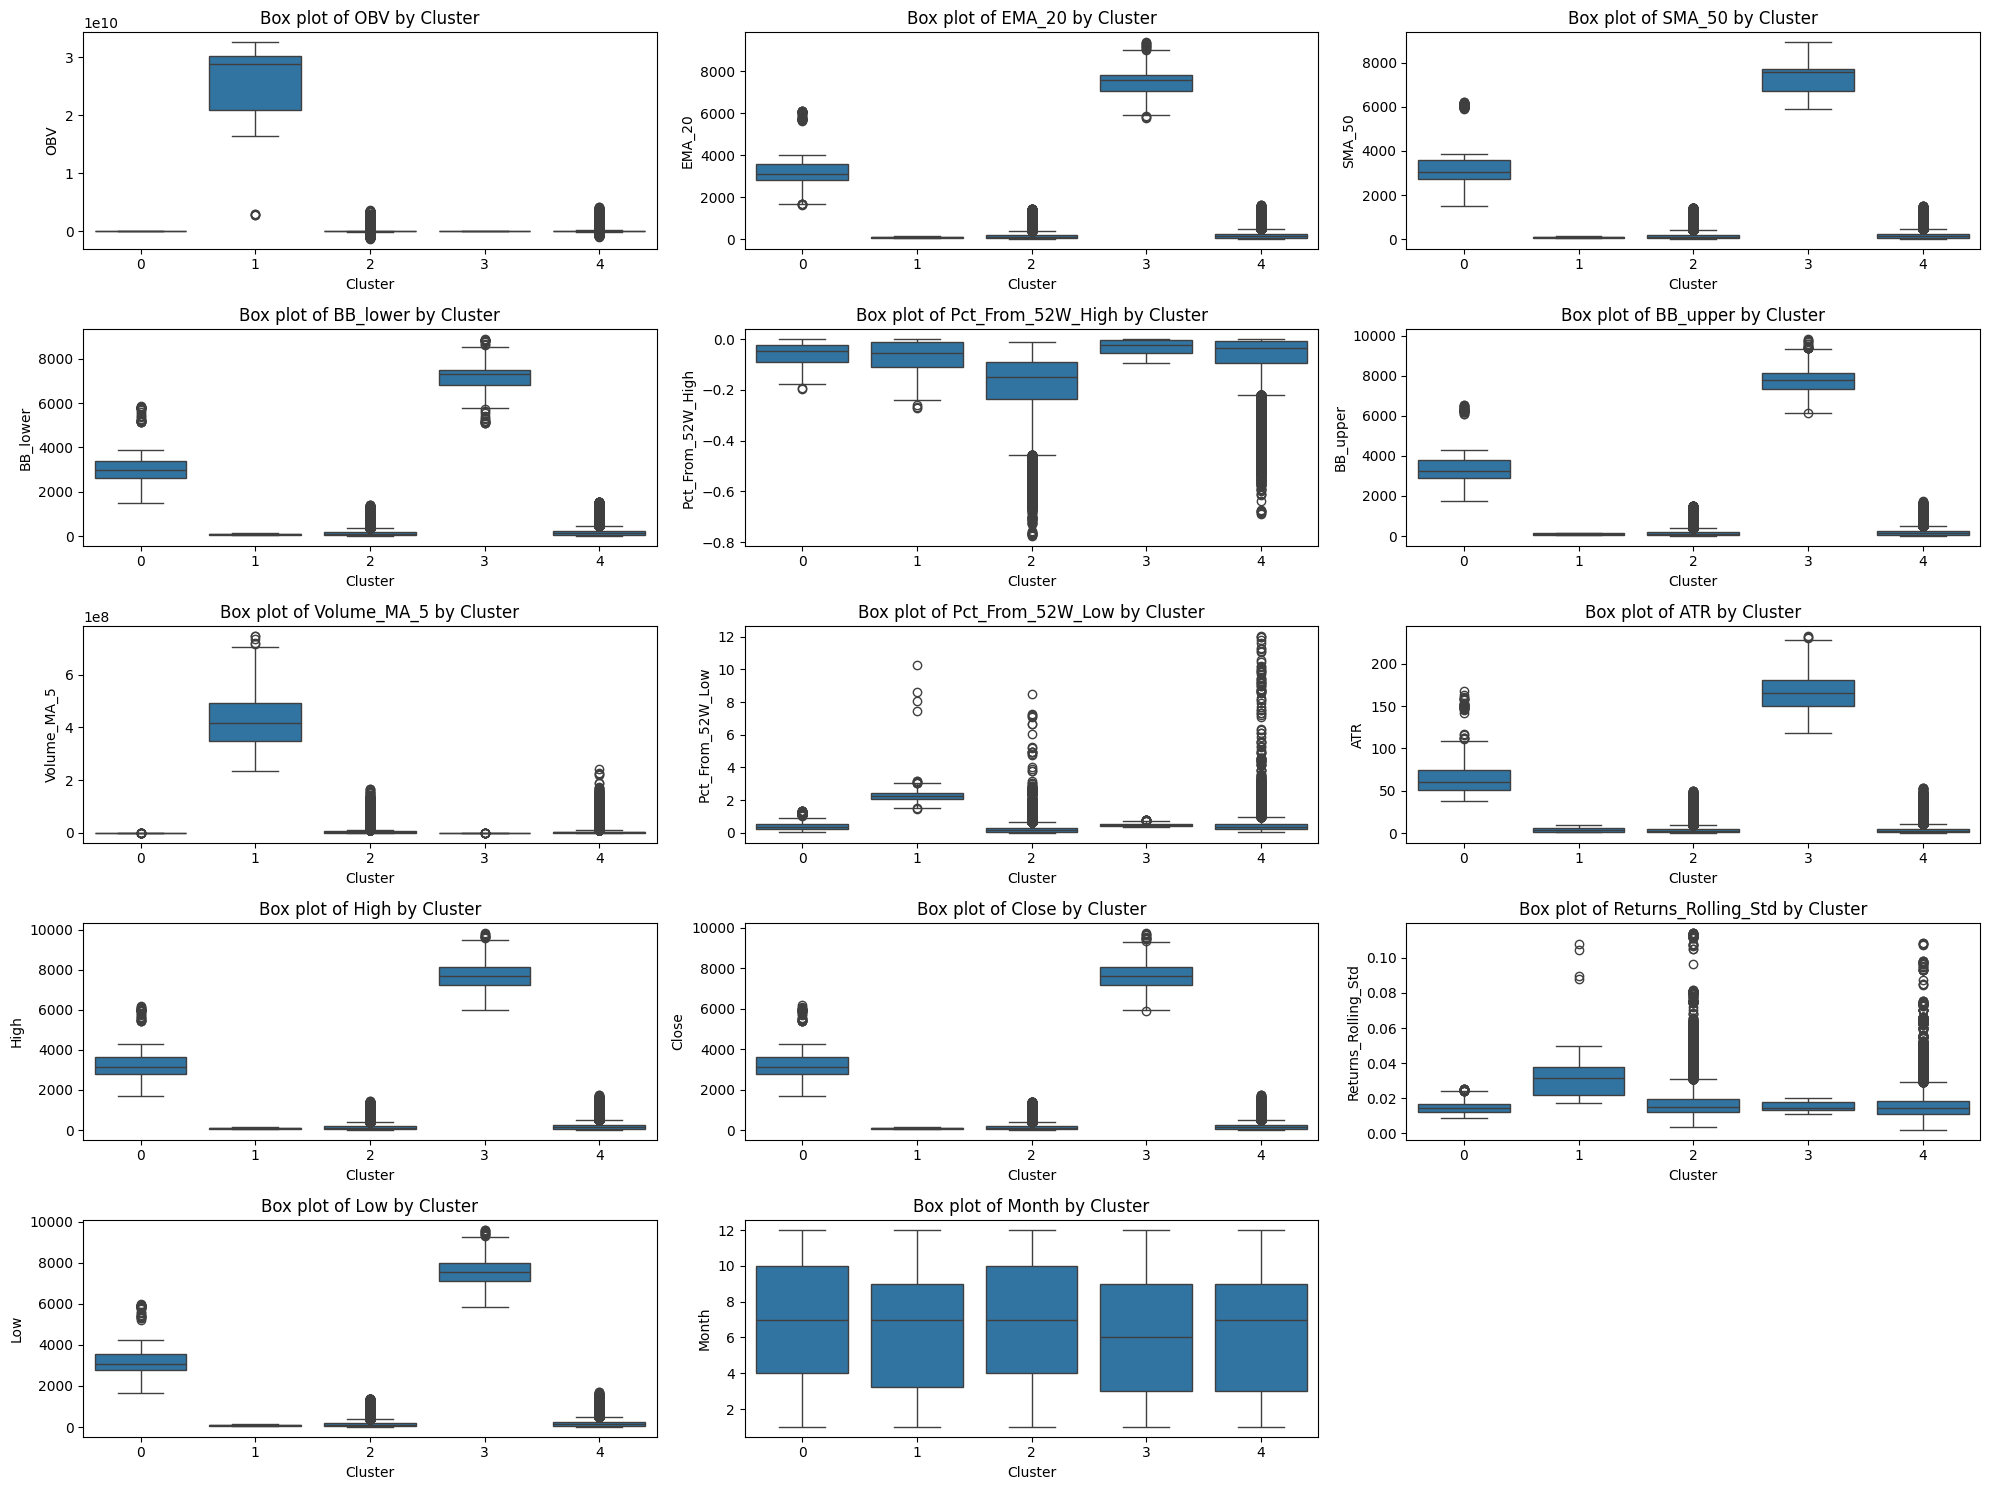

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create box plots for each important feature across clusters
plt.figure(figsize=(20, 15))
for i, feature in enumerate(important_features):
    plt.subplot(len(important_features) // 3 + 1, 3, i + 1)
    sns.boxplot(x='Cluster', y=feature, data=merged_data)
    plt.title(f'Box plot of {feature} by Cluster')
    plt.tight_layout()
plt.show()

In [73]:
# Assuming you have the KMeans model saved as 'kmeans'
# cluster_centers = pd.DataFrame(kmeans.cluster_centers_)#, columns=important_features)
# print(cluster_centers)

In [68]:
# # Create pair plots for important features, colored by cluster
# sns.pairplot(merged_data, vars=important_features, hue='Cluster', palette='viridis')
# plt.show()

Cluster
4    297
2    195
0      2
1      1
3      1
Name: count, dtype: int64


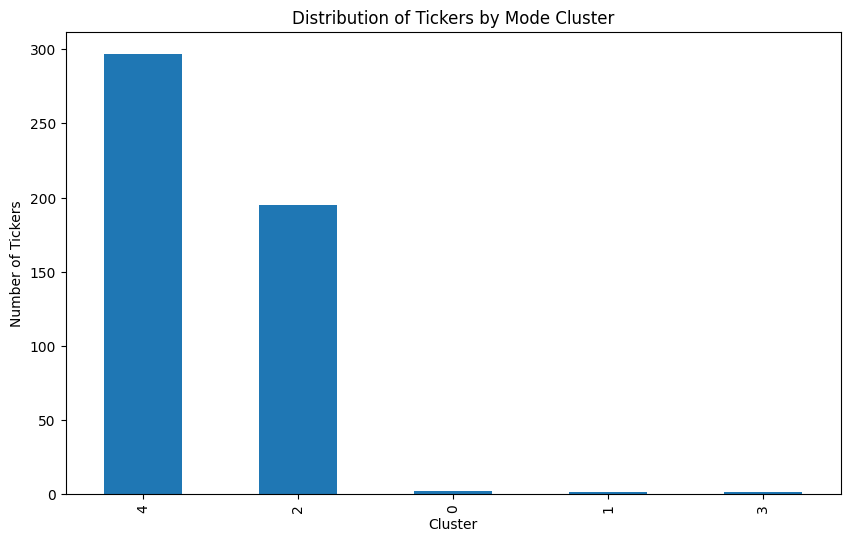

In [74]:
import pandas as pd

# Assuming 'merged_data' is your DataFrame
# Calculate the mode cluster for each ticker
ticker_mode_cluster = merged_data.groupby('Ticker')['Cluster'].agg(lambda x: x.mode()[0])

# Add the mode cluster back to the DataFrame
merged_data['Mode_Cluster'] = merged_data['Ticker'].map(ticker_mode_cluster)

# Analyze the distribution of tickers across clusters
cluster_distribution = ticker_mode_cluster.value_counts()
print(cluster_distribution)

# Optionally, visualize the distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
cluster_distribution.plot(kind='bar')
plt.title('Distribution of Tickers by Mode Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Tickers')
plt.show()

In [83]:
merged_data.columns

Index(['Date', 'Ticker', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Returns', 'SMA_50', 'EMA_20', 'RSI', 'BB_upper', 'BB_lower',
       'Volume_MA_5', 'Label', 'Close_Pct_Change', 'Volume_Pct_Change', 'MACD',
       'MACD_Signal', 'BB_Pct', 'Close_Lag_1', 'Volume_Lag_1', 'Close_Lag_2',
       'Volume_Lag_2', 'Close_Lag_3', 'Volume_Lag_3', 'Close_Lag_4',
       'Volume_Lag_4', 'Close_Lag_5', 'Volume_Lag_5', 'Returns_Rolling_Mean',
       'Returns_Rolling_Std', 'RSI_14', 'RSI_28', 'ATR', 'OBV', 'Momentum',
       'DayOfWeek', 'Month', '52W_High', '52W_Low', 'Pct_From_52W_High',
       'Pct_From_52W_Low', 'Label_Encoded', 'Predicted_Label',
       'Label_Encoded_inverse', 'Label_5', 'YearMonth', 'RSI_SMA_ratio',
       'MACD_SMA_ratio', 'BB_width', 'Price_to_SMA_ratio', 'Sector',
       'Sector_Encoded', 'Cluster', 'Mode_Cluster'],
      dtype='object')

1    434
2     60
3      2
Name: count, dtype: int64


/var/folders/7q/9t1f98rn10x46qx3z1s8kvp00000gp/T/ipykernel_60016/593273986.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ticker_mean_cluster = merged_data.groupby('Ticker').apply(


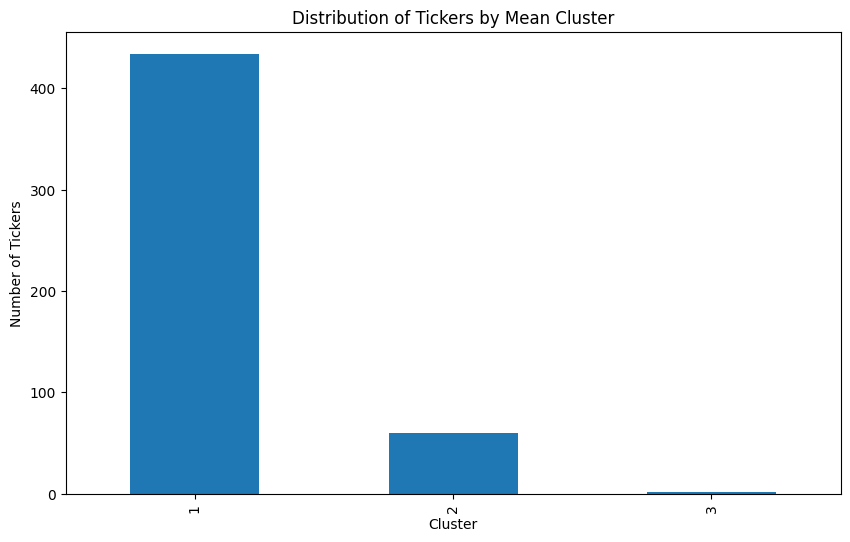

In [84]:
import pandas as pd
import numpy as np
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt

# Assuming 'merged_data' is your DataFrame and 'kmeans' is your fitted KMeans model
# Use the same features that were used to fit the KMeans model
features_used_for_clustering = features.columns.tolist()  # Assuming 'features' is the DataFrame used for clustering

# Calculate the mean distance to each cluster center for each ticker
def calculate_mean_cluster(ticker_data, cluster_centers):
    distances = pairwise_distances(ticker_data, cluster_centers)
    mean_distances = distances.mean(axis=0)
    return np.argmin(mean_distances)

# Group by ticker and calculate the mean cluster assignment
ticker_mean_cluster = merged_data.groupby('Ticker').apply(
    lambda group: calculate_mean_cluster(group[features_used_for_clustering], kmeans.cluster_centers_)
)

# Add the mean cluster back to the DataFrame
merged_data['Mean_Cluster'] = merged_data['Ticker'].map(ticker_mean_cluster)

# Analyze the distribution of tickers across clusters
mean_cluster_distribution = ticker_mean_cluster.value_counts()
print(mean_cluster_distribution)

# Optionally, visualize the distribution
plt.figure(figsize=(10, 6))
mean_cluster_distribution.plot(kind='bar')
plt.title('Distribution of Tickers by Mean Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Tickers')
plt.show()

Cluster
4.0    297
2.0    189
3.0      7
0.0      2
1.0      1
Name: count, dtype: int64


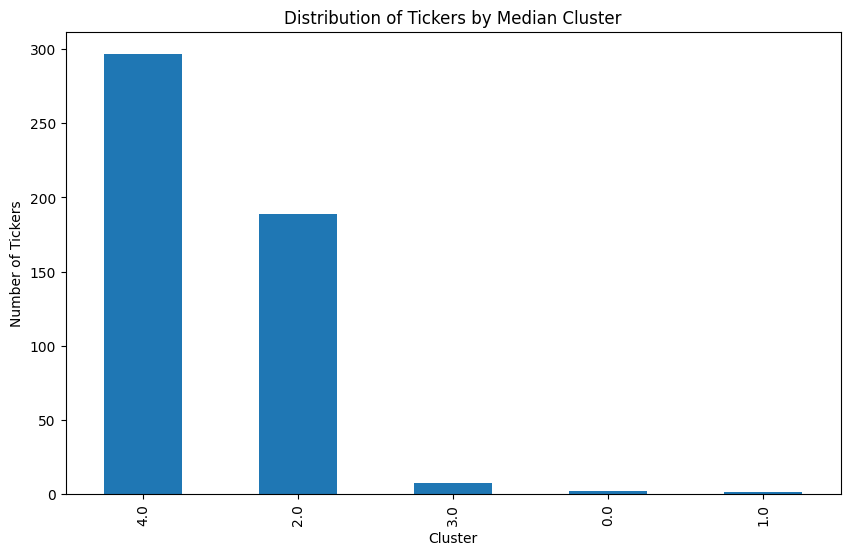

In [85]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'merged_data' is your DataFrame
# Calculate the median cluster for each ticker
ticker_median_cluster = merged_data.groupby('Ticker')['Cluster'].median()

# Add the median cluster back to the DataFrame
merged_data['Median_Cluster'] = merged_data['Ticker'].map(ticker_median_cluster)

# Analyze the distribution of tickers across clusters
median_cluster_distribution = ticker_median_cluster.value_counts()
print(median_cluster_distribution)

# Optionally, visualize the distribution
plt.figure(figsize=(10, 6))
median_cluster_distribution.plot(kind='bar')
plt.title('Distribution of Tickers by Median Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Tickers')
plt.show()

4    297
2    195
0      2
1      1
3      1
Name: count, dtype: int64


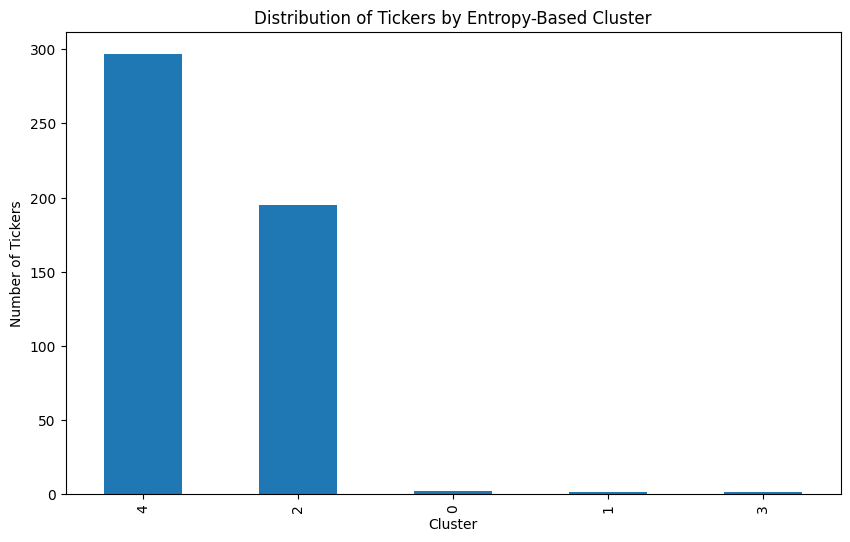

In [86]:
import pandas as pd
import numpy as np
from scipy.stats import entropy

# Assuming 'merged_data' is your DataFrame
# Calculate the frequency of cluster assignments for each ticker
cluster_frequencies = merged_data.groupby('Ticker')['Cluster'].value_counts(normalize=True).unstack(fill_value=0)

# Calculate entropy for each ticker
ticker_entropy = cluster_frequencies.apply(entropy, axis=1)

# Assign each ticker to the cluster with the lowest entropy
ticker_entropy_cluster = cluster_frequencies.idxmax(axis=1)

# Add the entropy-based cluster assignment back to the DataFrame
merged_data['Entropy_Cluster'] = merged_data['Ticker'].map(ticker_entropy_cluster)

# Analyze the distribution of tickers across clusters
entropy_cluster_distribution = ticker_entropy_cluster.value_counts()
print(entropy_cluster_distribution)

# Optionally, visualize the distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
entropy_cluster_distribution.plot(kind='bar')
plt.title('Distribution of Tickers by Entropy-Based Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Tickers')
plt.show()

In [87]:
import pandas as pd

# Assuming 'merged_data' is your DataFrame
# Calculate summary statistics for each feature within each cluster
cluster_summary = merged_data.groupby('Cluster').mean()
print(cluster_summary)

# Optionally, visualize feature distributions for each cluster
import matplotlib.pyplot as plt
import seaborn as sns

# Create box plots for each feature across clusters
plt.figure(figsize=(15, 10))
for i, feature in enumerate(merged_data.select_dtypes(include=[np.number]).columns):
    if feature != 'Cluster':
        plt.subplot(len(merged_data.columns) // 3 + 1, 3, i + 1)
        sns.boxplot(x='Cluster', y=feature, data=merged_data)
        plt.title(f'Box plot of {feature} by Cluster')
        plt.tight_layout()
plt.show()

TypeError: agg function failed [how->mean,dtype->object]

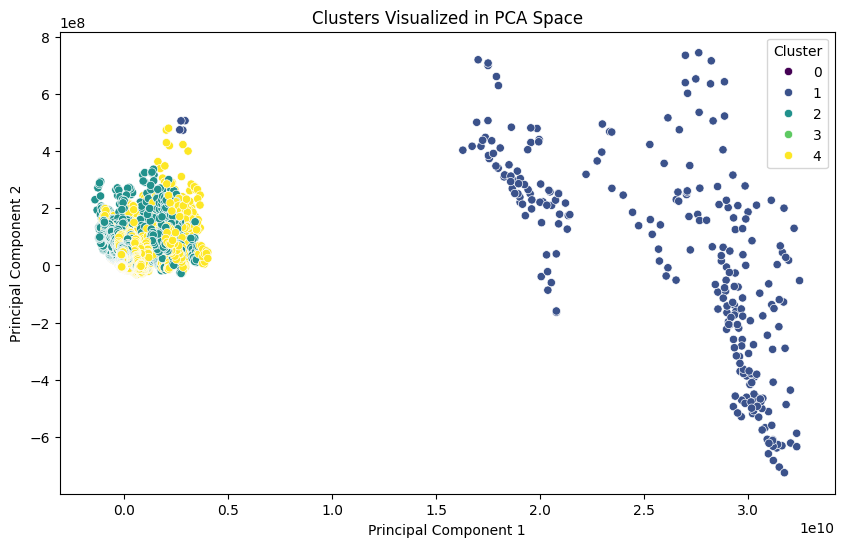

In [88]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Use all numerical features except 'Cluster'
features_for_pca = merged_data.select_dtypes(include=[np.number]).columns.tolist()
features_for_pca.remove('Cluster')

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(merged_data[features_for_pca])

# Add PCA results to the DataFrame
merged_data['PCA1'] = pca_result[:, 0]
merged_data['PCA2'] = pca_result[:, 1]

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=merged_data, palette='viridis')
plt.title('Clusters Visualized in PCA Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

In [89]:
import pandas as pd
import numpy as np
from scipy.stats import spearmanr

# Calculate pairwise correlations within each sector
def calculate_intra_sector_correlations(df, sector_col='Sector', price_col='Close', date_col='Date'):
    sector_correlations = {}
    for sector in df[sector_col].unique():
        sector_data = df[df[sector_col] == sector]
        pivot_df = sector_data.pivot(index=date_col, columns='Ticker', values=price_col)
        corr_matrix = pivot_df.pct_change().corr(method='spearman')
        sector_correlations[sector] = corr_matrix
    return sector_correlations

# Example usage
sector_correlations = calculate_intra_sector_correlations(merged_data)

In [90]:
sector_correlations

{'Healthcare': Ticker         A      ABBV       ABT      ALGN      AMGN       BAX       BDX  \
 Ticker                                                                         
 A       1.000000  0.195311  0.355759  0.366401  0.373262  0.409401  0.321291   
 ABBV    0.195311  1.000000  0.354526  0.086210  0.368104  0.210942  0.284014   
 ABT     0.355759  0.354526  1.000000  0.285471  0.298765  0.425985  0.441482   
 ALGN    0.366401  0.086210  0.285471  1.000000  0.256307  0.421415  0.283468   
 AMGN    0.373262  0.368104  0.298765  0.256307  1.000000  0.300018  0.335562   
 ...          ...       ...       ...       ...       ...       ...       ...   
 WAT     0.838058  0.192041  0.342431  0.431687  0.345652  0.402248  0.335308   
 WBA     0.331860  0.276154  0.155824  0.317744  0.296990  0.280657  0.233567   
 WST     0.350097  0.249871  0.184501  0.408231  0.280153  0.237020  0.356975   
 ZBH     0.425956  0.294626  0.483525  0.368079  0.361740  0.522081  0.442376   
 ZTS     0.351

In [93]:
features.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Returns',
       'SMA_50', 'EMA_20', 'RSI', 'BB_upper', 'BB_lower', 'Volume_MA_5',
       'Close_Pct_Change', 'Volume_Pct_Change', 'MACD', 'MACD_Signal',
       'BB_Pct', 'Close_Lag_1', 'Volume_Lag_1', 'Close_Lag_2', 'Volume_Lag_2',
       'Close_Lag_3', 'Volume_Lag_3', 'Close_Lag_4', 'Volume_Lag_4',
       'Close_Lag_5', 'Volume_Lag_5', 'Returns_Rolling_Mean',
       'Returns_Rolling_Std', 'RSI_14', 'RSI_28', 'ATR', 'OBV', 'Momentum',
       '52W_High', '52W_Low', 'Pct_From_52W_High', 'Pct_From_52W_Low',
       'RSI_SMA_ratio', 'MACD_SMA_ratio', 'BB_width', 'Price_to_SMA_ratio',
       'Sector_Encoded'],
      dtype='object')

## checking feature importance in assigning cluster 

In [94]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Prepare data
# X = merged_data.drop(columns=['Date','Cluster', 'Ticker', 'Sector'])  # Drop non-feature columns
X = features
y = merged_data['Cluster']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Feature importances
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print(importances)

RSI                     0.205403
RSI_14                  0.184676
Price_to_SMA_ratio      0.125911
RSI_28                  0.083099
BB_Pct                  0.062347
MACD_SMA_ratio          0.060918
Returns_Rolling_Mean    0.041385
MACD                    0.040810
Momentum                0.038976
MACD_Signal             0.032267
Pct_From_52W_High       0.025900
Pct_From_52W_Low        0.009282
Returns                 0.006678
Close_Pct_Change        0.006016
OBV                     0.004847
Close                   0.003837
Close_Lag_5             0.003781
Adj Close               0.003733
Close_Lag_3             0.003700
SMA_50                  0.003123
Open                    0.002892
RSI_SMA_ratio           0.002784
Close_Lag_4             0.002622
Volume                  0.002605
BB_upper                0.002600
Close_Lag_2             0.002582
52W_High                0.002560
Volume_Lag_3            0.002539
EMA_20                  0.002465
Close_Lag_1             0.002418
Volume_MA_

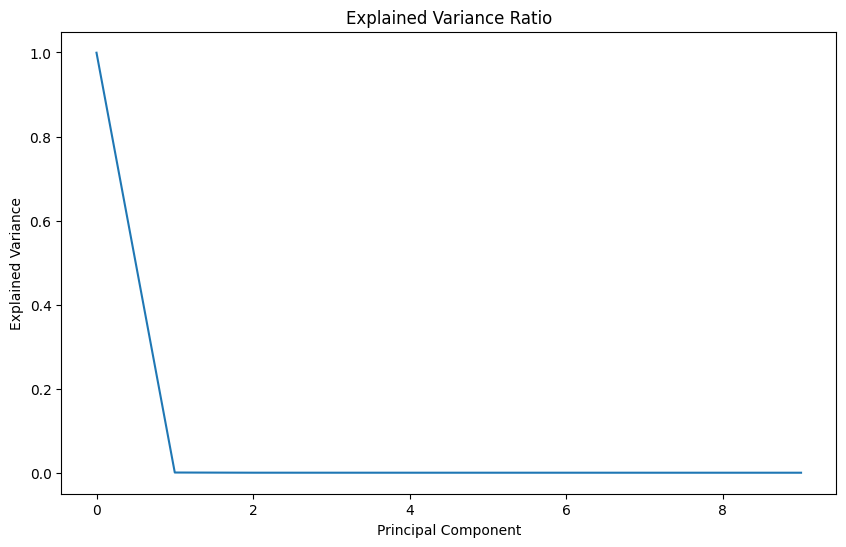

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score

df = merged_data.copy()
# Drop any missing values
df.dropna(inplace=True)

# Convert categorical variables to numerical
df['Sector'] = pd.Categorical(df['Sector']).codes
df['Label'] = pd.Categorical(df['Label']).codes
df['Label_Encoded'] = pd.Categorical(df['Label_Encoded']).codes
df['Predicted_Label'] = pd.Categorical(df['Predicted_Label']).codes
df['Label_Encoded_inverse'] = pd.Categorical(df['Label_Encoded_inverse']).codes
df['Label_5'] = pd.Categorical(df['Label_5']).codes


scaler = StandardScaler()
df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'SMA_50', 'EMA_20', 'RSI', 'BB_upper', 'BB_lower', 'Volume_MA_5', 
          'Close_Pct_Change', 'Volume_Pct_Change', 'MACD', 'MACD_Signal', 'BB_Pct', 'Close_Lag_1', 'Volume_Lag_1', 'Close_Lag_2', 
          'Volume_Lag_2', 'Close_Lag_3', 'Volume_Lag_3', 'Close_Lag_4', 'Volume_Lag_4', 'Close_Lag_5', 'Volume_Lag_5', 
          'Returns_Rolling_Mean', 'Returns_Rolling_Std', 'RSI_14', 'RSI_28', 'ATR', 'OBV', 'Momentum']] = scaler.fit_transform(df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'SMA_50', 'EMA_20', 'RSI', 'BB_upper', 'BB_lower', 'Volume_MA_5', 
                                                                                                                                  'Close_Pct_Change', 'Volume_Pct_Change', 'MACD', 'MACD_Signal', 'BB_Pct', 'Close_Lag_1', 'Volume_Lag_1', 'Close_Lag_2', 
                                                                                                                                  'Volume_Lag_2', 'Close_Lag_3', 'Volume_Lag_3', 'Close_Lag_4', 'Volume_Lag_4', 'Close_Lag_5', 'Volume_Lag_5', 
                                                                                                                                  'Returns_Rolling_Mean', 'Returns_Rolling_Std', 'RSI_14', 'RSI_28', 'ATR', 'OBV', 'Momentum']])



# Drop non-numeric columns before PCA
numeric_features = merged_data.select_dtypes(include=[np.number]).columns.tolist()
# Ensure 'Cluster' is not included in the features for PCA
numeric_features.remove('Cluster') if 'Cluster' in numeric_features else None

# Perform PCA to reduce dimensionality
pca = PCA(n_components=10)
df_pca = pca.fit_transform(merged_data[numeric_features])

# Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(pca.explained_variance_ratio_)
plt.title('Explained Variance Ratio')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.show()

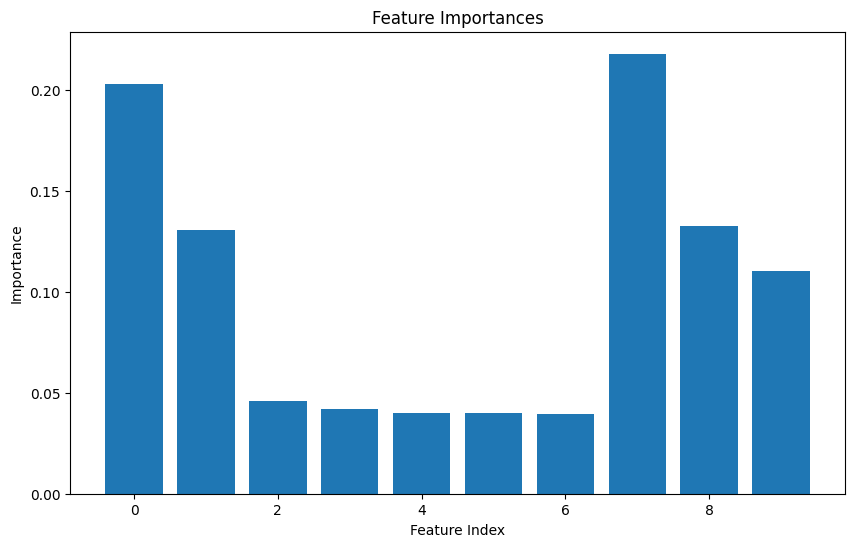

Accuracy: 1.0


In [31]:
# Perform random forest feature selection
rf = RandomForestClassifier(n_estimators=100)
rf.fit(df_pca, df['Label'])
# Get feature importances
feature_importances = rf.feature_importances_
# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances)
plt.title('Feature Importances')
plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.show()
# Select top 10 features
selector = SelectFromModel(rf, threshold=0.05)
selector.fit(df_pca, df['Label'])
support = selector.get_support()
# Train a new random forest model with the selected features
rf_new = RandomForestClassifier(n_estimators=100)
rf_new.fit(df_pca[:, support], df['Label'])
# Evaluate the model
y_pred = rf_new.predict(df_pca[:, support])
accuracy = accuracy_score(df['Label'], y_pred)
print('Accuracy:', accuracy)

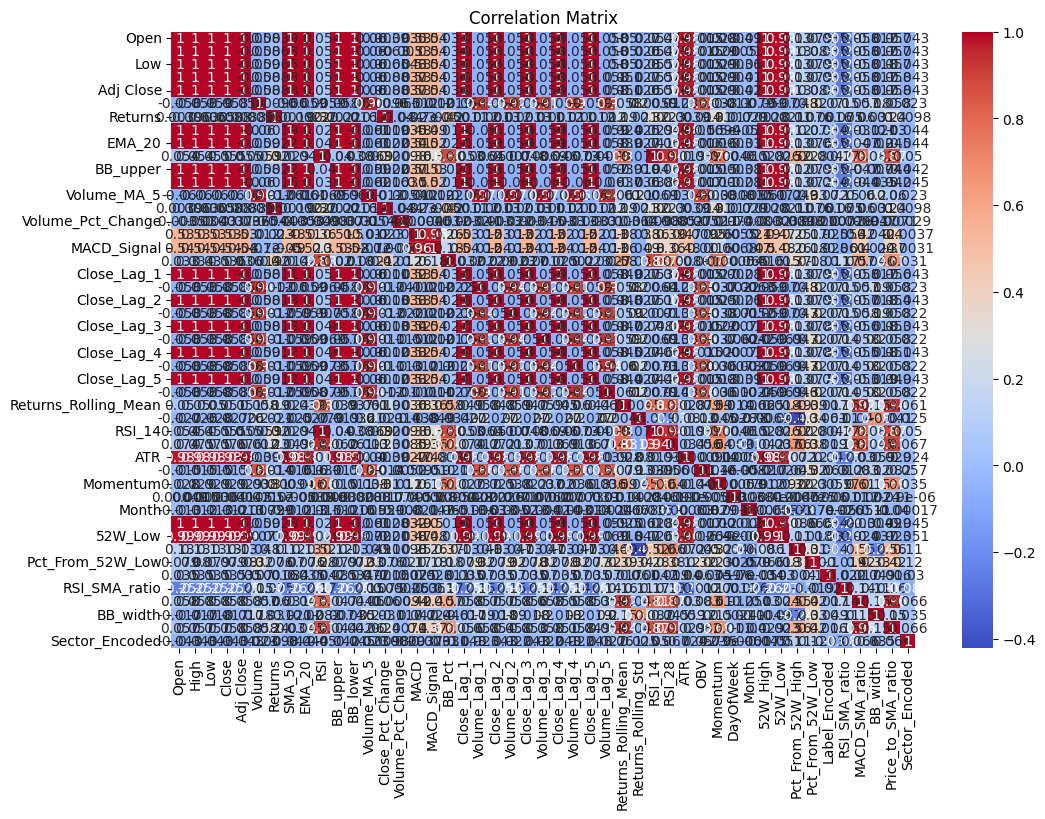

In [62]:
import seaborn as sns
corr_matrix = merged_data[numeric_features].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [67]:
# Calculate the correlation matrix
# corr_matrix = merged_data.corr()

# Remove features having correlation more than 0.5
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))  # Get upper triangle
to_drop = [column for column in upper.columns if any(upper[column] < 0.1)]
to_drop
# Drop the identified columns from the DataFrame
# merged_data = merged_data.drop(columns=to_drop)

['Volume',
 'Returns',
 'SMA_50',
 'EMA_20',
 'RSI',
 'BB_upper',
 'BB_lower',
 'Volume_MA_5',
 'Close_Pct_Change',
 'Volume_Pct_Change',
 'MACD',
 'MACD_Signal',
 'BB_Pct',
 'Close_Lag_1',
 'Volume_Lag_1',
 'Close_Lag_2',
 'Volume_Lag_2',
 'Close_Lag_3',
 'Volume_Lag_3',
 'Close_Lag_4',
 'Volume_Lag_4',
 'Close_Lag_5',
 'Volume_Lag_5',
 'Returns_Rolling_Mean',
 'Returns_Rolling_Std',
 'RSI_14',
 'RSI_28',
 'ATR',
 'OBV',
 'Momentum',
 'DayOfWeek',
 'Month',
 '52W_High',
 '52W_Low',
 'Pct_From_52W_High',
 'Pct_From_52W_Low',
 'Label_Encoded',
 'RSI_SMA_ratio',
 'MACD_SMA_ratio',
 'BB_width',
 'Price_to_SMA_ratio',
 'Sector_Encoded']

In [68]:
#  Get the upper triangle of the correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Identify features with correlation less than or equal to 0.5
not_highly_correlated = [column for column in upper.columns if all(upper[column] <= 0.5)]

# List of features that are not highly correlated
not_highly_correlated

[]

In [69]:
# Select only numeric columns for correlation calculation
numeric_data = merged_data.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = numeric_data.corr()

# Get the upper triangle of the correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Identify features with correlation less than or equal to 0.5
not_highly_correlated = [column for column in upper.columns if all(upper[column] <= 0.5)]

# Check if there are any features that are not highly correlated
if not_highly_correlated:
    print("Features not highly correlated:", not_highly_correlated)
else:
    print("All features are highly correlated.")

All features are highly correlated.


In [72]:
from scipy import stats

# Assuming 'Label_Encoded' is the stock movement and 'Sector_Encoded' is the sector
sector_groups = [merged_data['Label_Encoded'][merged_data['Sector_Encoded'] == sector] for sector in merged_data['Sector_Encoded'].unique()]

# Perform ANOVA
F_statistic, p_value = stats.f_oneway(*sector_groups)
print(f'ANOVA F-statistic: {F_statistic}, p-value: {p_value}')


ANOVA F-statistic: 457.8401490765166, p-value: 0.0


In [73]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

# Assume your dataframe is `df` with 'Date', 'CompanySymbol', 'Returns', and 'Sector_Encoded' columns
# Filter data for the top 20 S&P 500 companies
CompanySymbolWeight = ['AAPL', 'MSFT', 'NVDA', 'AMZN', 'META', 'GOOGL', 'BRK.B', 'GOOG', 'AVGO', 
                       'LLY', 'TSLA', 'JPM', 'UNH', 'XOM', 'V', 'MA', 'HD', 'PG', 'COST', 'JNJ']
df_filtered = merged_data[merged_data['Ticker'].isin(CompanySymbolWeight)]

# Assuming your data has 'Date', 'CompanySymbol', and 'Returns'
# Pivot the data to create a matrix where each column represents a company's daily returns
pivot_df = df_filtered.pivot_table(index='Date', columns='Ticker', values='Returns')
pivot_df


Ticker          AAPL      AMZN      AVGO      COST      GOOG     GOOGL  \
Date                                                                     
2023-09-26 -0.023398 -0.040299 -0.021226 -0.010132 -0.020580 -0.019373   
2023-09-27 -0.008897  0.000000  0.000760  0.019115  0.015527  0.015322   
2023-09-28  0.001526  0.000000  0.018597  0.009050  0.012703  0.013559   
2023-09-29  0.003046  0.009049 -0.001707 -0.006454 -0.009615 -0.010959   
2023-10-02  0.014836  0.018408  0.005261  0.011240  0.025180  0.025294   
...              ...       ...       ...       ...       ...       ...   
2024-09-23 -0.007581  0.011900  0.010754  0.011136 -0.009536 -0.010636   
2024-09-24  0.003974  0.000413  0.010986 -0.016945  0.003495  0.002718   
2024-09-25 -0.004398 -0.007373  0.003889  0.007631 -0.003972 -0.004929   
2024-09-26  0.005080 -0.007116  0.014642 -0.007684  0.005154  0.007678   
2024-09-27  0.001187 -0.016688 -0.030322 -0.017550  0.008912  0.007497   

Ticker            HD       JNJ       JPM       LLY        MA      META  \
Date                                                                     
2023-09-26 -0.012888 -0.007737 -0.010379 -0.004128 -0.017665 -0.006216   
2023-09-27 -0.002380 -0.012011  0.005865 -0.000455  0.000253 -0.004081   
2023-09-28  0.005533 -0.001464  0.012416 -0.009659  0.010013  0.020891   
2023-09-29 -0.004382 -0.007203 -0.017413 -0.013445 -0.008837 -0.012337   
2023-10-02 -0.007711 -0.003852 -0.008620  0.002160 -0.000152  0.022018   
...              ...       ...       ...       ...       ...       ...   
2024-09-23  0.005387 -0.005726  0.001658 -0.003223  0.008930  0.005451   
2024-09-24  0.022196 -0.002696  0.000709  0.006434 -0.019572 -0.001913   
2024-09-25 -0.009310 -0.013392 -0.006617  0.000141  0.004185  0.008840   
2024-09-26 -0.000579  0.004919 -0.001951 -0.016484  0.003718 -0.000827   
2024-09-27  0.007134  0.000062  0.003432 -0.034674  0.004824 -0.000845   

Ticker          MSFT      NVDA        PG      TSLA       UNH         V  \
Date                                                                     
2023-09-26 -0.017006 -0.007366 -0.008894 -0.011620 -0.009465 -0.015898   
2023-09-27  0.002082  0.013290 -0.013260 -0.014829 -0.003403 -0.000653   
2023-09-28  0.002717  0.014623 -0.006787  0.024449  0.012646  0.009412   
2023-09-29  0.006727  0.009515 -0.003280  0.015586 -0.011586 -0.007123   
2023-10-02  0.019161  0.029495 -0.004593  0.005515  0.020587  0.005478   
...              ...       ...       ...       ...       ...       ...   
2024-09-23 -0.004043  0.002241 -0.002583  0.049318 -0.002765  0.013555   
2024-09-24 -0.010011  0.039653 -0.003050  0.017080  0.003104 -0.054915   
2024-09-25  0.006850  0.021842 -0.005657  0.010815  0.001947 -0.011548   
2024-09-26 -0.001851  0.004291  0.005515 -0.010894 -0.002603  0.007640   
2024-09-27 -0.007628 -0.021283  0.001963  0.024546  0.012247  0.012809   

Ticker           XOM  
Date                  
2023-09-26  0.001549  
2023-09-27  0.032557  
2023-09-28 -0.006073  
2023-09-29 -0.015820  
2023-10-02 -0.016584  
...              ...  
2024-09-23  0.018131  
2024-09-24 -0.002641  
2024-09-25 -0.019479  
2024-09-26 -0.017165  
2024-09-27  0.026773  

[254 rows x 19 columns]

In [91]:
correlation_matrix = pivot_df.corr()

# Convert correlation matrix into a long format DataFrame for analysis
correlation_df = correlation_matrix.stack().reset_index(level=[0, 1], names=['Stock1', 'Stock2'])
# correlation_df.columns = ['Stock1', 'Stock2', 'Correlation']
correlation_df

TypeError: Series.reset_index() got an unexpected keyword argument 'names'

In [89]:
correlation_df.columns

['Stock1', 'Stock2', 'Correlation']

In [95]:
import pandas as pd

# Assuming pivot_df is your original DataFrame
correlation_matrix = pivot_df.corr()

# Print the structure of correlation_matrix
print("Structure of correlation_matrix:")
print(correlation_matrix.head())

# Convert correlation matrix into a long format DataFrame
correlation_df = correlation_matrix.reset_index()
correlation_df = pd.melt(correlation_df, id_vars=['Ticker'], var_name='Stock2', value_name='Correlation')
correlation_df = correlation_df.rename(columns={'Ticker': 'Stock1'})

# Print column names to check what we have
print("Column names after reshaping:", correlation_df.columns)

# Remove self-correlations and duplicate pairs
correlation_df = correlation_df[correlation_df['Stock1'] != correlation_df['Stock2']]
correlation_df = correlation_df[correlation_df['Stock1'] < correlation_df['Stock2']]

print("First few rows of correlation_df:")
print(correlation_df.head())

# Create a mapping of sectors to stock symbols (you need to define 'sector_map' based on your data)
sector_map = dict(zip(df_filtered['Ticker'], df_filtered['Sector_Encoded']))

# Map sectors to each stock
try:
    correlation_df['Sector1'] = correlation_df['Stock1'].map(sector_map)
    correlation_df['Sector2'] = correlation_df['Stock2'].map(sector_map)
except KeyError as e:
    print(f"KeyError encountered: {e}")
    print("Available columns in correlation_df:", correlation_df.columns)
    print("First few items of sector_map:")
    print(dict(list(sector_map.items())[:5]))

print("Final structure of correlation_df:")
print(correlation_df.head())

Structure of correlation_matrix:
Ticker      AAPL      AMZN      AVGO      COST      GOOG     GOOGL        HD  \
Ticker                                                                         
AAPL    1.000000  0.391459  0.353989  0.250225  0.410600  0.408629  0.237164   
AMZN    0.391459  1.000000  0.451828  0.361522  0.556001  0.558454  0.270484   
AVGO    0.353989  0.451828  1.000000  0.438661  0.319176  0.318563  0.329756   
COST    0.250225  0.361522  0.438661  1.000000  0.265994  0.267976  0.270905   
GOOG    0.410600  0.556001  0.319176  0.265994  1.000000  0.997796  0.141363   

Ticker       JNJ       JPM       LLY        MA      META      MSFT      NVDA  \
Ticker                                                                         
AAPL   -0.026447  0.046184  0.163118  0.250717  0.251857  0.477386  0.311904   
AMZN   -0.110911  0.156191  0.300106  0.303911  0.606361  0.623673  0.482149   
AVGO   -0.254194  0.125194  0.291372  0.299703  0.361717  0.467794  0.690664   
COST  

In [100]:
# Identify intra-sector and inter-sector correlations
# correlation_df['Same_Sector'] = correlation_df['Sector1'] == correlation_df['Sector2']
correlation_df.to_clipboard(sep=',')


In [98]:
# Calculate intra-sector and inter-sector correlations
intra_sector_corr = correlation_df[correlation_df['Same_Sector'] == True]['Correlation']
inter_sector_corr = correlation_df[correlation_df['Same_Sector'] == False]['Correlation']

# Compare the means of intra-sector and inter-sector correlations
intra_sector_mean = np.mean(intra_sector_corr)
inter_sector_mean = np.mean(inter_sector_corr)

print(f"Average Intra-Sector Correlation: {intra_sector_mean}")
print(f"Average Inter-Sector Correlation: {inter_sector_mean}")


Average Intra-Sector Correlation: 0.37371727010777944
Average Inter-Sector Correlation: 0.17259523941539823


In [99]:
# Conduct a t-test to check if the difference is statistically significant
t_stat, p_value = ttest_ind(intra_sector_corr, inter_sector_corr, equal_var=False)
print(f"T-statistic: {t_stat}, P-value: {p_value}")
# If p-value is small (e.g., < 0.05), we reject the null hypothesis that intra- and inter-sector correlations are the same


T-statistic: 3.341989350926366, P-value: 0.0031400431496072067
